In [2]:
import streamlit as st 

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

import pandas as pd
import numpy as np
from xgboost.sklearn import XGBRegressor

st.set_page_config( 
    layout='wide')
st.title("Simulator")
st.markdown('**HF Predicted Value**')

st.sidebar.title('Features')

#----------------------------------------------------------------------------------------------------
first_kpi, second_kpi = st.columns(2)

def load_model():
	TSA_num_61 = pd.read_csv(r'D:\Users\pawass\Documents\TSA\Champ_models_version1\TSA_HF.csv')
	TSA_num_61 = TSA_num_61[['TSA_TAPPI_1','Reel_Start_Date', 'HF', 'Release_Dose_Calc_mg_m' ,'HEADBOX_PRES_psig' ,'Steam_Box_Pressure_PSIG' 
			,'PM15_Winder_Speed_FPM' ,'Refiner_1_HPD_T' ,'UHLEBOX1_VAC_Inhg' ,'Hi_Bright_PM15_Ratio'
			,'EosYMoiPv_pct' ,'Coating_Dose_Calc_mg_m' ,'Refiner_3_HP_Control' ,'Metso_Rush_Drag_to_DV'
			,'EUC_PM15_Ratio' ,'VirginStock_PM15_Ratio' ,'RPW_Pressure_PSI' ,'PM_BWT_lbs_3000sqft'
			,'PM15_Fan_Pump_ORP_pH' ,'Refiner_2_HPD_T' ,'PM_15_TWS_Flow__ton']]
	
	train_61 = TSA_num_61.loc[((TSA_num_61['Reel_Start_Date'] >= '2021-01-01') & (TSA_num_61['Reel_Start_Date'] < '2021-10-04'))]
	test_61 = TSA_num_61.loc[(TSA_num_61['Reel_Start_Date'] >= '2021-10-04')]
	
	X_train = train_61.drop(['HF', 'Reel_Start_Date' ,'TSA_TAPPI_1'], axis = 1)
	y_train = train_61['HF']

	X_test = test_61.drop(['HF', 'Reel_Start_Date', 'TSA_TAPPI_1'], axis = 1)
	y_test = test_61['HF']

	# HF 1st jan 21 to 20th oct 18 features nexgen data
	xgb = XGBRegressor(min_child_weight = 3, max_depth = 7, gamma = 0, subsample = 0.5, colsample_bytree = 0.5,
                  n_estimators = 1000, learning_rate = 0.3)

	# fit the model with the training data
	xgb.fit(X_train,y_train)
	df_1 = get_input_data()
	pred_value = xgb.predict(df_1)
	return pred_value

def main():
    with first_kpi:
        
        number1 = pred_value
        st.markdown(f"<h1 style='text-align: center;background : rgb(0,165,173); color: white;'>{number1}</h1>", unsafe_allow_html=True)

    st.markdown("<hr/>", unsafe_allow_html = True)


if __name__=='__main__': 
    main()

NameError: name 'pred_value' is not defined

In [3]:
%%writefile app.py
 
import pickle
import streamlit as st
 
# loading the trained model
# pickle_in = open('classifier.pkl', 'rb') 
# classifier = pickle.load(pickle_in)
 
@st.cache()
  
# defining the function which will make the prediction using the data which the user inputs 
# def prediction(Gender, Married, ApplicantIncome, LoanAmount, Credit_History):   
 
#     # Pre-processing user input    
#     if Gender == "Male":
#         Gender = 0
#     else:
#         Gender = 1
 
#     if Married == "Unmarried":
#         Married = 0
#     else:
#         Married = 1
 
#     if Credit_History == "Unclear Debts":
#         Credit_History = 0
#     else:
#         Credit_History = 1  
 
#     LoanAmount = LoanAmount / 1000
 
#     # Making predictions 
#     prediction = classifier.predict( 
#         [[Gender, Married, ApplicantIncome, LoanAmount, Credit_History]])
     
#     if prediction == 0:
#         pred = 'Rejected'
#     else:
#         pred = 'Approved'
#     return pred
      
  
# this is the main function in which we define our webpage  
def main():       
    # front end elements of the web page 
    html_temp = """ 
    <div style ="background-color:yellow;padding:13px"> 
    <h1 style ="color:black;text-align:center;">Streamlit Loan Prediction ML App</h1> 
    </div> 
    """
      
    # display the front end aspect
    st.markdown(html_temp, unsafe_allow_html = True) 
      
    # following lines create boxes in which user can enter data required to make prediction 
    Gender = st.selectbox('Gender',("Male","Female"))
    Married = st.selectbox('Marital Status',("Unmarried","Married")) 
    ApplicantIncome = st.number_input("Applicants monthly income") 
    LoanAmount = st.number_input("Total loan amount")
    Credit_History = st.selectbox('Credit_History',("Unclear Debts","No Unclear Debts"))
    result =""
      
    # when 'Predict' is clicked, make the prediction and store it 
#     if st.button("Predict"): 
#         result = prediction(Gender, Married, ApplicantIncome, LoanAmount, Credit_History) 
#         st.success('Your loan is {}'.format(result))
#         print(LoanAmount)
     
if __name__=='__main__': 
    main()

Overwriting app.py


In [5]:
from pyngrok import ngrok
 
public_url = ngrok.connect('8501')
public_url

2021-11-10 15:04:21.384 Opening tunnel named: http-8501-ae376999-774f-4012-a3d8-2f0f4e178d9b
2021-11-10 15:04:21.873 t=2021-11-10T15:04:21+0530 lvl=info msg="no configuration paths supplied"
2021-11-10 15:04:21.887 t=2021-11-10T15:04:21+0530 lvl=info msg="using configuration at default config path" path=D:\\Users\\pawass/.ngrok2/ngrok.yml
2021-11-10 15:04:21.890 t=2021-11-10T15:04:21+0530 lvl=info msg="open config file" path=D:\\Users\\pawass\\.ngrok2\\ngrok.yml err=nil
2021-11-10 15:04:21.992 t=2021-11-10T15:04:21+0530 lvl=info msg="starting web service" obj=web addr=127.0.0.1:4040
2021-11-10 15:04:22.382 t=2021-11-10T15:04:22+0530 lvl=eror msg="failed to reconnect session" obj=csess id=56f3cd709ea2 err="read tcp 10.225.206.133:60862->3.133.228.214:443: wsarecv: An existing connection was forcibly closed by the remote host."
2021-11-10 15:04:22.914 t=2021-11-10T15:04:22+0530 lvl=eror msg="failed to reconnect session" obj=csess id=56f3cd709ea2 err="read tcp 10.225.206.133:60864->3.133.

PyngrokNgrokError: The ngrok process errored on start: read tcp 10.225.206.133:60877->3.20.27.198:443: wsarecv: An existing connection was forcibly closed by the remote host..

In [ ]:
!streamlit run app.py &>/dev/null&

In [16]:
TSA_num_61 = pd.read_csv(r'D:\Users\pawass\Documents\TSA\Champ_models_version1\TSA_HF.csv')
TSA_num_61 = TSA_num_61[['Reel_Start_Date', 'HF', 'Release_Dose_Calc_mg_m' ,'HEADBOX_PRES_psig' ,'Steam_Box_Pressure_PSIG' 
			,'PM15_Winder_Speed_FPM' ,'Refiner_1_HPD_T' ,'UHLEBOX1_VAC_Inhg' ,'Hi_Bright_PM15_Ratio'
			,'EosYMoiPv_pct' ,'Coating_Dose_Calc_mg_m' ,'Refiner_3_HP_Control' ,'Metso_Rush_Drag_to_DV'
			,'EUC_PM15_Ratio' ,'VirginStock_PM15_Ratio' ,'RPW_Pressure_PSI' ,'PM_BWT_lbs_3000sqft'
			,'PM15_Fan_Pump_ORP_pH' ,'Refiner_2_HPD_T' ,'PM_15_TWS_Flow__ton']]

TSA_num_61

,Reel_Start_Date,HF,Release_Dose_Calc_mg_m,HEADBOX_PRES_psig,Steam_Box_Pressure_PSIG,PM15_Winder_Speed_FPM,Refiner_1_HPD_T,UHLEBOX1_VAC_Inhg,Hi_Bright_PM15_Ratio,EosYMoiPv_pct,Coating_Dose_Calc_mg_m,Refiner_3_HP_Control,Metso_Rush_Drag_to_DV,EUC_PM15_Ratio,VirginStock_PM15_Ratio,RPW_Pressure_PSI,PM_BWT_lbs_3000sqft,PM15_Fan_Pump_ORP_pH,Refiner_2_HPD_T,PM_15_TWS_Flow__ton
0,2/1/2020,83.4,4.810,37.890,1.179,1542.936,0.325,18.703,25.0,3.741,5.591,222.759,1576.873,75.0,0.0,59.962,12.900,5.801,8.239,11.196
1,2/1/2020,85.6,4.776,37.889,1.190,1987.870,0.325,18.679,25.0,3.704,5.094,234.990,1576.526,75.0,0.0,64.269,12.950,5.799,7.428,11.207
2,2/1/2020,86.8,4.828,37.891,1.141,2056.669,0.317,18.710,25.0,3.835,5.115,232.529,1576.953,75.0,0.0,59.775,12.918,5.795,5.558,11.198
3,2/2/2020,86.7,4.773,37.893,1.179,2695.635,0.319,18.719,25.0,3.802,5.095,211.424,1577.022,75.0,0.0,59.156,12.810,5.804,7.800,11.196
4,2/2/2020,86.4,4.795,37.891,1.166,1793.076,0.321,18.721,25.0,3.802,5.098,219.838,1577.118,75.0,0.0,59.888,13.000,5.800,6.672,11.202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1815,10/17/2021,88.7,6.700,31.000,0.900,0.000,0.000,17.200,25.0,4.100,5.500,163.000,1609.900,75.0,0.0,64.200,15.300,105.300,0.170,8.500
1816,10/17/2021,89.0,6.700,31.000,0.900,0.000,0.000,17.200,25.0,4.100,5.500,183.000,1610.500,75.0,0.0,63.200,15.300,95.100,0.170,8.500
1817,10/17/2021,88.7,6.700,31.000,0.900,0.000,0.000,17.200,25.0,4.100,5.500,176.000,1610.500,75.0,0.0,52.400,15.400,147.400,0.170,8.300
1818,10/17/2021,88.5,6.700,31.000,0.900,0.000,0.000,17.200,25.0,4.100,5.500,179.000,1610.200,75.0,0.0,63.300,15.300,398.700,0.170,8.300


In [13]:
f1 = 6
f2 = 20
f3 = 1
f4 = 2000
f5 = 1
f6 = 10
f7 = 15
f8 = 3
f9 = 3
f10 = 200
f11 = 1000
f12 = 50
f13 = 50
f14 = 50
f15 = 10
f16 = 300
f17 = 10
f18 = 10

input_data = pd.DataFrame.from_dict({'Release_Dose_Calc_mg_m': [f1], 'HEADBOX_PRES_psig': [f2],
                             'Steam_Box_Pressure_PSIG': [f3], 'PM15_Winder_Speed_FPM': [f4], 'Refiner_1_HPD_T': [f5], 
                             'UHLEBOX1_VAC_Inhg': [f6], 'Hi_Bright_PM15_Ratio': [f7], 'EosYMoiPv_pct': [f8],
                             'Coating_Dose_Calc_mg_m': [f9], 'Refiner_3_HP_Control': [f10], 'Metso_Rush_Drag_to_DV': [f11],
                             'EUC_PM15_Ratio': [f12], 'VirginStock_PM15_Ratio': [f13], 'RPW_Pressure_PSI': [f14]
            , 'PM_BWT_lbs_3000sqft': [f15], 'PM15_Fan_Pump_ORP_pH': [f16], 'Refiner_2_HPD_T': [f17]
            , 'PM_15_TWS_Flow__ton': [f18]})

input_data.loc[0]

Release_Dose_Calc_mg_m        6
HEADBOX_PRES_psig            20
Steam_Box_Pressure_PSIG       1
PM15_Winder_Speed_FPM      2000
Refiner_1_HPD_T               1
UHLEBOX1_VAC_Inhg            10
Hi_Bright_PM15_Ratio         15
EosYMoiPv_pct                 3
Coating_Dose_Calc_mg_m        3
Refiner_3_HP_Control        200
Metso_Rush_Drag_to_DV      1000
EUC_PM15_Ratio               50
VirginStock_PM15_Ratio       50
RPW_Pressure_PSI             50
PM_BWT_lbs_3000sqft          10
PM15_Fan_Pump_ORP_pH        300
Refiner_2_HPD_T              10
PM_15_TWS_Flow__ton          10
Name: 0, dtype: int64

In [ ]:
def main():       
    # front end elements of the web page 
    html_temp = """ 
    <div style ="background-color:yellow;padding:13px"> 
    <h1 style ="color:black;text-align:center;">Streamlit Loan Prediction ML App</h1> 
    </div> 
    """
      
    # display the front end aspect
    st.markdown(html_temp, unsafe_allow_html = True) 
      
    # following lines create boxes in which user can enter data required to make prediction 
    Gender = st.selectbox('Gender',("Male","Female"))
    Married = st.selectbox('Marital Status',("Unmarried","Married")) 
    ApplicantIncome = st.number_input("Applicants monthly income") 
    LoanAmount = st.number_input("Total loan amount")
    Credit_History = st.selectbox('Credit_History',("Unclear Debts","No Unclear Debts"))
    result =""
      
    # when 'Predict' is clicked, make the prediction and store it 
    if st.button("Predict"): 
        result = prediction(Gender, Married, ApplicantIncome, LoanAmount, Credit_History) 
        st.success('Your loan is {}'.format(result))
        print(LoanAmount)

In [8]:
import pickle
pickle_in = open(r'D:\Users\pawass\Documents\TSA\Champ_models_version1\TS7_0911.pkl', 'rb')
xgb = pickle.load(pickle_in)
xgb.feature_importances_

array([0.0498768 , 0.06242908, 0.04351978, 0.03540761, 0.0776962 ,
       0.04467453, 0.05069671, 0.04936472, 0.05273722, 0.04677936,
       0.07099088, 0.14281486, 0.        , 0.04239161, 0.0487444 ,
       0.04382921, 0.0736008 , 0.06444627], dtype=float32)

In [1]:
!pip install pgmpy
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
import statsmodels.api as sm
import seaborn as sns
import matplotlib
from scipy.stats import skew
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from scipy.stats.stats import pearsonr
%matplotlib inline
from subprocess import check_output
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame
from xgboost.sklearn import XGBRegressor
import matplotlib.pyplot as plt
import matplotlib
import shap
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from scipy import stats
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import tree
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore
# from dataprep.eda import plot
from pgmpy.models import BayesianModel
from datetime import datetime

In [2]:
# MSK_PM15_TSA_June_18th_Final

missing_value_formats = ["n.a.","?","NA","n/a", "na", "--"]

TSA_data = pd.read_csv(r"D:\Users\pawass\Documents\TSA\Champ_models_version1\msk_tsa_data_final_2009.csv", na_values = missing_value_formats, header = 1)
# parse_dates = ['Reel_Start_Date', 'Reel_Turn_Up_Date', 'Reel_Turnup_30min', 
#                                                                                                                  'Reel_Turnup_1hr', 'Reel_Turnup_45mins']
TSA_data.shape

(2050, 113)

# Null Value Treatment

In [4]:
TSA = TSA_data.copy()

TSA_id = TSA['TSA_TAPPI_1']

TSA.head()

,ICPAQS_Reel_Number,Reel_Start_Date,Reel_Turn_Up_Date,Reel_Turnup_30min,Reel_Turnup_1hr,Reel_Turnup_45mins,TSA_TAPPI_1,HF,TS7,TS750,...,SucPresHiVacPres_Mode_A_M,PKUPSHOE_VAC_Mode_A_M_C,Crepe_Doctr_Pres_Switch_Status,PM15_Crepe_Doctor_Material,Cleaning_Doctor_Material,Crepe_Doctor_TS_Vibration,Crepe_Doctor_DS_Vibration,Cleaning_Doctor_TS_Vibration,Cleaning_Doctor_DS_Vibration,PM15_Blade_Change
0,GPM50B0101,2/1/2020,1/2/2020 7:39,1/2/2020,1/2/2020 6:39,1/2/2020 6:54,GPM50B0101,83.4,15.5,17.7,...,Auto,Auto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GPM50B0104,2/1/2020,1/2/2020 11:10,1/2/2020,1/2/2020 10:10,1/2/2020 10:25,GPM50B0104,85.6,13.9,18.0,...,Auto,Auto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GPM50B0108,2/1/2020,1/2/2020 15:19,1/2/2020,1/2/2020 14:19,1/2/2020 14:34,GPM50B0108,86.8,13.2,16.7,...,Auto,Auto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GPM50B0123,2/2/2020,2/2/2020 6:33,2/2/2020,2/2/2020 5:33,2/2/2020 5:48,GPM50B0123,86.7,13.4,15.7,...,Auto,Auto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,GPM50B0202,2/2/2020,2/2/2020 8:37,2/2/2020,2/2/2020 7:37,2/2/2020 7:52,GPM50B0202,86.4,13.4,17.9,...,Auto,Auto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Dropping Null Value Columns and refiner status columns
TSA.drop(['Crepe_Doctor_Angle_Deg', 'Refiner_1_-_Status_ON_OFF', 'Refiner_2_-_Status_ON_OFF', 'PM15_Crepe_Doctor_Material', 
          'Cleaning_Doctor_Material', 'Crepe_Doctr_Pres_Switch_Status', 'Refiner_3_-_Status_ON_OFF', 
          'High-Brite_Tank_Consistency_pct', 'PM15_M_C_Chest_Consistency_pct', 'PM15_Slice_Velocity_FPM', 'PM15_Jet_Wire_Ratio' ,
          'Crepe_Doctor_TS_Vibration', 'Crepe_Doctor_DS_Vibration', 'Cleaning_Doctor_TS_Vibration', 'Cleaning_Doctor_DS_Vibration',
         'PM15_Blade_Change'], axis = 1, inplace = True)
# 'Crepe_Doctor_TS_Vibration', 'Crepe_Doctor_DS_Vibration', 'Cleaning_Doctor_TS_Vibration', 'Cleaning_Doctor_DS_Vibration'
# TSA.info()

In [6]:
#Columns with negative values
TSA['Felt_Soft_Pump_Flow_ml_min'] = np.where(TSA['Felt_Soft_Pump_Flow_ml_min'] < 0 , 0, TSA['Felt_Soft_Pump_Flow_ml_min'])
min(TSA['Felt_Soft_Pump_Flow_ml_min'])

#Columns with negative values
TSA['PM15_Fan_Pump_ORP_pH'] = np.where(TSA['PM15_Fan_Pump_ORP_pH'] < 0 , 0, TSA['PM15_Fan_Pump_ORP_pH'])
min(TSA['PM15_Fan_Pump_ORP_pH'])

0.0

In [7]:
TSA['EosYMoiPv_pct'] = np.where(TSA['EosYMoiPv_pct'] == '[-11059] No Good Data For Calculation', None, TSA['EosYMoiPv_pct'])
TSA['EosYMoiPv_pct'] = TSA['EosYMoiPv_pct'].astype('float64')

TSA['Eos_Fiber_BWT_lbs_3000sqft'] = np.where(TSA['Eos_Fiber_BWT_lbs_3000sqft'] == '[-11059] No Good Data For Calculation', None, TSA['Eos_Fiber_BWT_lbs_3000sqft'])
TSA['Eos_Fiber_BWT_lbs_3000sqft'] = TSA['Eos_Fiber_BWT_lbs_3000sqft'].astype('float64')
# 'EosYMoiPv_pct', 'Eos_Fiber_BWT_lbs_3000sqft'

In [8]:
# Forward Filling the Features
missing_col_ff = ['Refiner_3_HP_Control', 'PM15_Crepe_Ratio', 'Softener_Sprayboom_Flow_GPM', 'Felt_Soft_Pump_Flow_ml_min',
                  'Yankee_Spray_Boom_Pres_PSI', 'SucPresLoVacPres_SP_InHg', 'SucPresHiVacPres_InHg', 'Reel_Drum_FPM', 
                  'Yankee_Speed_FPM', 'Yankee_Release_Flow_Mode_A_M_C', 'Yankee_Coating_Flow_Mode_A_M_C', 
                  'Yankee_MAP_Flow_Mode_A_M_L', 'PM_15_TWS_Flow_Mode_A_M_L', 'Felt_Soft_Pump_Flow_Mode_A_M', 
                  'YANKEE_STEAM_Mode_A_M_C', 'WE_BURNER_mode_A_C_deg_F', 'DE_BURNER_modeA_C_deg_F', 
                  'Headbox_Pres_modeA_M_C_PSIG', 'UHLEBOX1_VAC_Mode_A_M_Inhg', 'UHLEBOX2_VAC_Mode_A_M_Inhg', 
                  'SucPresLoVacPres_Mode_A_M', 'SucPresHiVacPres_Mode_A_M', 'PKUPSHOE_VAC_Mode_A_M_C', 'PM15_Winder_Speed_FPM']
for i in missing_col_ff:
    TSA[i].ffill(axis = 0, inplace = True)
    
    
# Backward Filling the Features
missing_col_bb = ['Refiner_1_HPD_T_Mode_A_M_C', 'Refiner_2_HPD_T_Mode_A_M_C', 'Refiner_3_HP_Mode_A_M_C', 
                  'Refiner_3_Bypass_Switch']
for i in missing_col_bb:
    TSA[i].bfill(axis = 0, inplace = True)
    
    
# Mean Imputation for other cells
missing_col_mean = ['EosYMoiPv_pct', 'Eos_Fiber_BWT_lbs_3000sqft', 'PM_15_TWS_Flow_ml_min', 'PM_15_TWS_Flow__ton',
                    'PKUPSHOE_VAC_InHg']
# , 'Crepe_Doctor_TS_Vibration', 'Crepe_Doctor_DS_Vibration', 'Cleaning_Doctor_TS_Vibration', 'Cleaning_Doctor_DS_Vibration'
for i in missing_col_mean:
     TSA.loc[TSA.loc[:,i].isnull(),i]=TSA.loc[:,i].mean()

In [9]:
# Convert the date to datetime64
TSA['Reel_Start_Date'] = pd.to_datetime(TSA['Reel_Start_Date'])
TSA['Reel_Start_Date']

0      2020-02-01
1      2020-02-01
2      2020-02-01
3      2020-02-02
4      2020-02-02
          ...    
2045   2021-10-17
2046   2021-10-17
2047   2021-10-17
2048   2021-10-17
2049   2021-10-18
Name: Reel_Start_Date, Length: 2050, dtype: datetime64[ns]

In [10]:
TSA_old_prod = TSA.copy()

# Remove data for quater 4
TSA_old_prod = TSA_old_prod.loc[(TSA_old_prod['Reel_Start_Date'] < '2020-10-01') | (TSA_old_prod['Reel_Start_Date'] > '2020-12-31')]
TSA_old_prod.sort_values('Reel_Start_Date')

,ICPAQS_Reel_Number,Reel_Start_Date,Reel_Turn_Up_Date,Reel_Turnup_30min,Reel_Turnup_1hr,Reel_Turnup_45mins,TSA_TAPPI_1,HF,TS7,TS750,...,Felt_Soft_Pump_Flow_Mode_A_M,YANKEE_STEAM_Mode_A_M_C,WE_BURNER_mode_A_C_deg_F,DE_BURNER_modeA_C_deg_F,Headbox_Pres_modeA_M_C_PSIG,UHLEBOX1_VAC_Mode_A_M_Inhg,UHLEBOX2_VAC_Mode_A_M_Inhg,SucPresLoVacPres_Mode_A_M,SucPresHiVacPres_Mode_A_M,PKUPSHOE_VAC_Mode_A_M_C
0,GPM50B0101,2020-02-01,1/2/2020 7:39,1/2/2020,1/2/2020 6:39,1/2/2020 6:54,GPM50B0101,83.4,15.5,17.7,...,Auto,CAS,CAS,CAS,CAS,Auto,Auto,Auto,Auto,Auto
1,GPM50B0104,2020-02-01,1/2/2020 11:10,1/2/2020,1/2/2020 10:10,1/2/2020 10:25,GPM50B0104,85.6,13.9,18.0,...,Auto,CAS,CAS,CAS,CAS,Auto,Auto,Auto,Auto,Auto
2,GPM50B0108,2020-02-01,1/2/2020 15:19,1/2/2020,1/2/2020 14:19,1/2/2020 14:34,GPM50B0108,86.8,13.2,16.7,...,Auto,CAS,CAS,CAS,CAS,Auto,Auto,Auto,Auto,Auto
3,GPM50B0123,2020-02-02,2/2/2020 6:33,2/2/2020,2/2/2020 5:33,2/2/2020 5:48,GPM50B0123,86.7,13.4,15.7,...,Auto,CAS,CAS,CAS,CAS,Auto,Auto,Auto,Auto,Auto
4,GPM50B0202,2020-02-02,2/2/2020 8:37,2/2/2020,2/2/2020 7:37,2/2/2020 7:52,GPM50B0202,86.4,13.4,17.9,...,Auto,CAS,CAS,CAS,CAS,Auto,Auto,Auto,Auto,Auto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2047,GPM51K1620,2021-10-17,10/17/2021 6:42,10/17/2021 6:12,10/17/2021 5:42,10/17/2021 5:57,GPM51K1620,88.7,12.3,16.5,...,Man,CAS,CAS,CAS,CAS,Auto,Man,Auto,Auto,Auto
2048,GPM51K1701,2021-10-17,10/17/2021 8:46,10/17/2021 8:16,10/17/2021 7:46,10/17/2021 8:01,GPM51K1701,88.5,12.5,17.4,...,Man,CAS,CAS,CAS,CAS,Auto,Man,Auto,Auto,Auto
2045,GPM51K1614,2021-10-17,10/17/2021 0:29,10/16/2021 23:59,10/16/2021 23:29,10/16/2021 23:44,GPM51K1614,88.7,12.5,16.1,...,Man,CAS,CAS,CAS,CAS,Auto,Man,Auto,Auto,Auto
2046,GPM51K1616,2021-10-17,10/17/2021 2:33,10/17/2021 2:03,10/17/2021 1:33,10/17/2021 1:48,GPM51K1616,89.0,12.4,16.6,...,Man,CAS,CAS,CAS,CAS,Auto,Man,Auto,Auto,Auto


In [11]:
TSA_old_prod.columns[TSA_old_prod.isnull().any()].tolist()

['TS750', 'D']

In [12]:
# Dropping set point columns to have lower correlation with refiner columns
setpt_col = ['Refiner_1_HPD_T_Set_Point', 'Refiner_2_HPD_T_Set_Point', 'Release_Dose_Calc_SetPt_mg_m', 
             'Yankee_Rel_Flow_Set_Ptml_min', 'Coating_Dose_Calc_SetPt_mg_m', 'Yankee_Coa_Flow_Set_Ptml_min', 
             'Yankee_MAP_Flow_SetPt_ml_min', 'YANKEE_STEAM_Set_Point_PSI', 'Refiner_3_Control_SP', 
             'PM_15_TWS_Flow_SP__ton', 'Felt_Soft_Pump_Flow_SPml_min',
             'WE_BURNER_SP_deg_F', 'DE_BURNER_sp_deg_F', 'Headbox_Pressure_sp_PSIG', 'UHLEBOX1_VAC_SP_Inhg', 
             'UHLEBOX2_VAC_SP_Inhg', 'SucPresLoVacPres_SP_InHg', 'PKUPSHOE_VAC_SP_InHg', 'SucPresHiVacPres_InHg.1']
len(setpt_col)
TSA_num_no_setpt = TSA_old_prod.drop(setpt_col, axis = 1)

# Columns with 0 Standard Deviation

In [13]:
# # Removing column with std as 0
# threshold = 0
# TSA_thres = TSA_old_prod.std()[TSA_old_prod.std() == threshold]
# TSA_thres
# TSA_num = TSA_num.drop('TSA_num.std()[TSA_num.std() == threshold].index.values, axis=1, , inplace = True)
# TSA_num
# TSA_num = TSA_num.drop('PKUPSHOE_VAC_SP_InHg', axis = 1)
# TSA_num

# Correlation matrix

## Correlation Heatmap

In [14]:
# Find the columns with high correlation with the target 
# Find the columns which are highly correlated in itself

# fig = plt.figure(figsize =(100, 100))
# sns.heatmap(x_train.corr(), annot=True, cmap = plt.cm.CMRmap_r)
# plt.show()

In [15]:
# fig = plt.figure(figsize =(100, 100))
# sns.heatmap(TSA_num.corr(), annot=True, cmap = plt.cm.CMRmap_r)
# plt.show()

In [16]:
# Change the color of dataframe
# TF_no_setpt = TF_no_setpt.style.set_properties(**{'background-color': '#ADD8E6',
#                            'color': 'black'})

## Correlation Pairs

In [17]:
# #For getting the Highly correlated Pairs 
# def correlation_pairs(dataset, threshold):
#     pairs_to_drop = set() #for having unique set of values
#     corr_matrix = dataset.corr()
#     cols = dataset.columns
#     for i in range(len(corr_matrix.columns)):
#         for j in range(i):
#             if abs(corr_matrix.iloc[i,j]) > threshold:
#                 pairs_to_drop.add((cols[i], cols[j], corr_matrix.iloc[i,j]))
#     return pairs_to_drop

In [18]:
# corr_features_pairs = correlation_pairs(x_train, 0.65)
# len(corr_features_pairs)

In [19]:
# corr_features_pairs

In [20]:
# # convert set to dataframe
# df = pd.DataFrame(list(corr_features_pairs))
# df.rename(columns = {0:'Feature 1', 1:'Feature 2', 2:'Correlation'}, inplace = True)
# # df
# # df.to_csv('C:\\Users\\Pawas.seth\\Documents\\TSA\\Final_dict\\Corr_feature_pairs_0.7.csv')

## Correlation Columns

In [21]:
# # For getting the columns with high correlation
# def correlation(dataset, threshold):
#     col_corr = set() #for having unique set of values
#     corr_matrix = dataset.corr()
#     for i in range(len(corr_matrix.columns)):
#         for j in range(i):
#             if abs(corr_matrix.iloc[i,j]) > threshold:
#                 colname = corr_matrix.columns[i]
#                 col_corr.add((colname, corr_matrix.iloc[i,j]))
#     return col_corr

In [22]:
# corr_features = correlation(x_train, 0.7)
# len(corr_features)

In [23]:
# corr_features

In [24]:
# # convert set to dataframe
# df_col = pd.DataFrame(list(corr_features))
# df_col.rename(columns = {0:'Feature 1', 1:'Correlation'}, inplace = True)

# Label Encoding

In [25]:
# Dropping IDS and Date column
TSA_num_no_setpt.drop(['ICPAQS_Reel_Number', 'Reel_Turn_Up_Date', 'Reel_Turnup_30min',
                                         'Reel_Turnup_1hr', 'Reel_Turnup_45mins', 'TSA_TAPPI_1'], axis = 1, inplace= True)

In [26]:
TSA_nonum = TSA_num_no_setpt.select_dtypes(include=np.object)
# TSA_nonum.info()

In [27]:
# creating instance of labelencoder
labelencoder = LabelEncoder()
col_list = []
# Assigning numerical values and storing in another column
for col in TSA_nonum.columns:
    col_list.append(col)
    TSA_nonum[col] = labelencoder.fit_transform(TSA_nonum[col])
TSA_nonum

,Refiner_1_HPD_T_Mode_A_M_C,Refiner_2_HPD_T_Mode_A_M_C,Refiner_3_HP_Mode_A_M_C,Refiner_3_Bypass_Switch,Yankee_Release_Flow_Mode_A_M_C,Yankee_Coating_Flow_Mode_A_M_C,Yankee_MAP_Flow_Mode_A_M_L,PM_15_TWS_Flow_Mode_A_M_L,Felt_Soft_Pump_Flow_Mode_A_M,YANKEE_STEAM_Mode_A_M_C,WE_BURNER_mode_A_C_deg_F,DE_BURNER_modeA_C_deg_F,Headbox_Pres_modeA_M_C_PSIG,UHLEBOX1_VAC_Mode_A_M_Inhg,UHLEBOX2_VAC_Mode_A_M_Inhg,SucPresLoVacPres_Mode_A_M,SucPresHiVacPres_Mode_A_M,PKUPSHOE_VAC_Mode_A_M_C
0,0,1,0,1,1,1,0,0,0,1,1,1,1,0,0,0,0,0
1,0,1,0,1,1,1,0,0,0,1,1,1,1,0,0,0,0,0
2,0,1,0,1,1,1,0,0,0,1,1,1,1,0,0,0,0,0
3,0,1,0,1,1,1,0,0,0,1,1,1,1,0,0,0,0,0
4,0,1,0,1,1,1,0,0,0,1,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2045,1,0,0,1,1,1,0,0,1,1,1,1,1,0,1,0,0,0
2046,1,0,0,1,1,1,0,0,1,1,1,1,1,0,1,0,0,0
2047,1,0,0,1,1,1,0,0,1,1,1,1,1,0,1,0,0,0
2048,1,0,0,1,1,1,0,0,1,1,1,1,1,0,1,0,0,0


In [28]:
len(col_list)

18

In [29]:
TSA_num_no_setpt.drop(col_list, axis = 1, inplace= True)

TSA_num_no_setpt = TSA_num_no_setpt.join(TSA_nonum)
TSA_num_no_setpt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1820 entries, 0 to 2049
Data columns (total 72 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Reel_Start_Date                 1820 non-null   datetime64[ns]
 1   HF                              1820 non-null   float64       
 2   TS7                             1820 non-null   float64       
 3   TS750                           1818 non-null   float64       
 4   D                               1802 non-null   float64       
 5   Hi_Bright_PM15_Ratio            1820 non-null   float64       
 6   EUC_PM15_Ratio                  1820 non-null   float64       
 7   VirginStock_PM15_Ratio          1820 non-null   float64       
 8   Broke_PM15_Ratio                1820 non-null   float64       
 9   Refiner_1_HPD_T                 1820 non-null   float64       
 10  Refiner_2_HPD_T                 1820 non-null   float64       
 11  Refi

In [30]:
# mod = ['Refiner_1_HPD_T_Mode_A_M_C'
# ,'Refiner_2_HPD_T_Mode_A_M_C'
# ,'Refiner_3_HP_Mode_A_M_C'
# ,'Yankee_Release_Flow_Mode_A_M_C'
# ,'Yankee_Coating_Flow_Mode_A_M_C'
# ,'Yankee_MAP_Flow_Mode_A_M_L'
# ,'PM_15_TWS_Flow_Mode_A_M_L'
# ,'Felt_Soft_Pump_Flow_Mode_A_M'
# ,'YANKEE_STEAM_Mode_A_M_C'
# ,'WE_BURNER_mode_A_C_deg_F'
# ,'DE_BURNER_modeA_C_deg_F'
# ,'Headbox_Pres_modeA_M_C_PSIG'
# ,'UHLEBOX1_VAC_Mode_A_M_Inhg'
# ,'UHLEBOX2_VAC_Mode_A_M_Inhg'
# ,'SucPresLoVacPres_Mode_A_M'
# ,'SucPresHiVacPres_Mode_A_M'
# ,'PKUPSHOE_VAC_Mode_A_M_C'
# ]
# len(mod)

# TSA_num_no_setpt.drop(mod, axis = 1, inplace= True)

In [31]:
#Removing categorical columns with single values
Single_val_cat_col = ['Yankee_MAP_Flow_Mode_A_M_L', 'PM_15_TWS_Flow_Mode_A_M_L', 'UHLEBOX2_VAC_Mode_A_M_Inhg', 
                      'SucPresLoVacPres_Mode_A_M','SucPresHiVacPres_Mode_A_M', 'PKUPSHOE_VAC_Mode_A_M_C']

TSA_num_no_setpt.drop(Single_val_cat_col, axis = 1, inplace= True)

In [32]:
TSA_num_no_setpt_cpy = TSA_num_no_setpt.copy()

In [33]:
TSA_num_61 = TSA_num_no_setpt.copy()

In [34]:
high_cor_final = ['TWS_Flow_Output_Pump_2_Speed',
                  'Yankee_Coating_Flow_ml_min', 'Yankee_Drive_1_FPM', 'PM_15_TWS_Flow_ml_min', 'Yankee_Release_Flow_ml_min', 
                    'Steam_Yankee_Sat_Temp_deg_F', 'Fan_Pump_Speed_RPM', 'TWS_Flow_Output_Pump_1_Speed', 
                    'Eos_Fiber_BWT_lbs_3000sqft', 'Felt_Soft_Pump_Flow_ml_min']

TSA_num_no_setpt_cpy.drop(high_cor_final, axis = 1, inplace= True)
TSA_num_no_setpt_cpy

,Reel_Start_Date,HF,TS7,TS750,D,Hi_Bright_PM15_Ratio,EUC_PM15_Ratio,VirginStock_PM15_Ratio,Broke_PM15_Ratio,Refiner_1_HPD_T,...,Refiner_3_HP_Mode_A_M_C,Refiner_3_Bypass_Switch,Yankee_Release_Flow_Mode_A_M_C,Yankee_Coating_Flow_Mode_A_M_C,Felt_Soft_Pump_Flow_Mode_A_M,YANKEE_STEAM_Mode_A_M_C,WE_BURNER_mode_A_C_deg_F,DE_BURNER_modeA_C_deg_F,Headbox_Pres_modeA_M_C_PSIG,UHLEBOX1_VAC_Mode_A_M_Inhg
0,2020-02-01,83.4,15.5,17.7,3.4,25.0,75.0,0.0,10.7,0.325,...,0,1,1,1,0,1,1,1,1,0
1,2020-02-01,85.6,13.9,18.0,3.4,25.0,75.0,0.0,25.0,0.325,...,0,1,1,1,0,1,1,1,1,0
2,2020-02-01,86.8,13.2,16.7,3.5,25.0,75.0,0.0,24.9,0.317,...,0,1,1,1,0,1,1,1,1,0
3,2020-02-02,86.7,13.4,15.7,3.5,25.0,75.0,0.0,25.0,0.319,...,0,1,1,1,0,1,1,1,1,0
4,2020-02-02,86.4,13.4,17.9,3.5,25.0,75.0,0.0,25.0,0.321,...,0,1,1,1,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2045,2021-10-17,88.7,12.5,16.1,3.7,25.0,75.0,0.0,16.0,0.000,...,0,1,1,1,1,1,1,1,1,0
2046,2021-10-17,89.0,12.4,16.6,3.8,25.0,75.0,0.0,16.0,0.000,...,0,1,1,1,1,1,1,1,1,0
2047,2021-10-17,88.7,12.3,16.5,3.6,25.0,75.0,0.0,16.0,0.000,...,0,1,1,1,1,1,1,1,1,0
2048,2021-10-17,88.5,12.5,17.4,3.7,25.0,75.0,0.0,16.0,0.000,...,0,1,1,1,1,1,1,1,1,0


In [35]:
#Feature Selection Dataframe
TSA_num_no_setpt_cpy.drop(['D','TS750'], axis = 1, inplace = True)

In [36]:
TSA_num_61.drop(['D','TS750'], axis = 1, inplace = True)

In [37]:
#Merging id column in the dataframe
TSA_num_no_setpt_cpy = TSA_num_no_setpt_cpy.join(TSA_id)
TSA_num_no_setpt_cpy.sort_values("Reel_Start_Date").head()

,Reel_Start_Date,HF,TS7,Hi_Bright_PM15_Ratio,EUC_PM15_Ratio,VirginStock_PM15_Ratio,Broke_PM15_Ratio,Refiner_1_HPD_T,Refiner_2_HPD_T,Refiner_3_HP_Control,...,Refiner_3_Bypass_Switch,Yankee_Release_Flow_Mode_A_M_C,Yankee_Coating_Flow_Mode_A_M_C,Felt_Soft_Pump_Flow_Mode_A_M,YANKEE_STEAM_Mode_A_M_C,WE_BURNER_mode_A_C_deg_F,DE_BURNER_modeA_C_deg_F,Headbox_Pres_modeA_M_C_PSIG,UHLEBOX1_VAC_Mode_A_M_Inhg,TSA_TAPPI_1
0,2020-02-01,83.4,15.5,25.0,75.0,0.0,10.7,0.325,8.239,222.759,...,1,1,1,0,1,1,1,1,0,GPM50B0101
1,2020-02-01,85.6,13.9,25.0,75.0,0.0,25.0,0.325,7.428,234.990,...,1,1,1,0,1,1,1,1,0,GPM50B0104
2,2020-02-01,86.8,13.2,25.0,75.0,0.0,24.9,0.317,5.558,232.529,...,1,1,1,0,1,1,1,1,0,GPM50B0108
3,2020-02-02,86.7,13.4,25.0,75.0,0.0,25.0,0.319,7.800,211.424,...,1,1,1,0,1,1,1,1,0,GPM50B0123
4,2020-02-02,86.4,13.4,25.0,75.0,0.0,25.0,0.321,6.672,219.838,...,1,1,1,0,1,1,1,1,0,GPM50B0202


In [38]:
TSA_num_61.shape

(1820, 64)

In [39]:
# Merging id column in the dataframe
TSA_num_61 = TSA_num_61.join(TSA_id)
TSA_num_61.sort_values("Reel_Start_Date").head()

,Reel_Start_Date,HF,TS7,Hi_Bright_PM15_Ratio,EUC_PM15_Ratio,VirginStock_PM15_Ratio,Broke_PM15_Ratio,Refiner_1_HPD_T,Refiner_2_HPD_T,Refiner_3_HP_Control,...,Refiner_3_Bypass_Switch,Yankee_Release_Flow_Mode_A_M_C,Yankee_Coating_Flow_Mode_A_M_C,Felt_Soft_Pump_Flow_Mode_A_M,YANKEE_STEAM_Mode_A_M_C,WE_BURNER_mode_A_C_deg_F,DE_BURNER_modeA_C_deg_F,Headbox_Pres_modeA_M_C_PSIG,UHLEBOX1_VAC_Mode_A_M_Inhg,TSA_TAPPI_1
0,2020-02-01,83.4,15.5,25.0,75.0,0.0,10.7,0.325,8.239,222.759,...,1,1,1,0,1,1,1,1,0,GPM50B0101
1,2020-02-01,85.6,13.9,25.0,75.0,0.0,25.0,0.325,7.428,234.990,...,1,1,1,0,1,1,1,1,0,GPM50B0104
2,2020-02-01,86.8,13.2,25.0,75.0,0.0,24.9,0.317,5.558,232.529,...,1,1,1,0,1,1,1,1,0,GPM50B0108
3,2020-02-02,86.7,13.4,25.0,75.0,0.0,25.0,0.319,7.800,211.424,...,1,1,1,0,1,1,1,1,0,GPM50B0123
4,2020-02-02,86.4,13.4,25.0,75.0,0.0,25.0,0.321,6.672,219.838,...,1,1,1,0,1,1,1,1,0,GPM50B0202


In [40]:
# TSA_num_61.to_clipboard()

# Feature Selection

In [41]:
TSA_num_no_setpt_cpy['select_1'] =  np.where((TSA_num_no_setpt_cpy['Reel_Start_Date'] < '2021-02-09') | ((TSA_num_no_setpt_cpy['Reel_Start_Date'] >= '2021-05-01') & (TSA_num_no_setpt_cpy['Reel_Start_Date'] < '2021-07-12')), 'train', 'test')
TSA_num_no_setpt_cpy.head()

,Reel_Start_Date,HF,TS7,Hi_Bright_PM15_Ratio,EUC_PM15_Ratio,VirginStock_PM15_Ratio,Broke_PM15_Ratio,Refiner_1_HPD_T,Refiner_2_HPD_T,Refiner_3_HP_Control,...,Yankee_Release_Flow_Mode_A_M_C,Yankee_Coating_Flow_Mode_A_M_C,Felt_Soft_Pump_Flow_Mode_A_M,YANKEE_STEAM_Mode_A_M_C,WE_BURNER_mode_A_C_deg_F,DE_BURNER_modeA_C_deg_F,Headbox_Pres_modeA_M_C_PSIG,UHLEBOX1_VAC_Mode_A_M_Inhg,TSA_TAPPI_1,select_1
0,2020-02-01,83.4,15.5,25.0,75.0,0.0,10.7,0.325,8.239,222.759,...,1,1,0,1,1,1,1,0,GPM50B0101,train
1,2020-02-01,85.6,13.9,25.0,75.0,0.0,25.0,0.325,7.428,234.990,...,1,1,0,1,1,1,1,0,GPM50B0104,train
2,2020-02-01,86.8,13.2,25.0,75.0,0.0,24.9,0.317,5.558,232.529,...,1,1,0,1,1,1,1,0,GPM50B0108,train
3,2020-02-02,86.7,13.4,25.0,75.0,0.0,25.0,0.319,7.800,211.424,...,1,1,0,1,1,1,1,0,GPM50B0123,train
4,2020-02-02,86.4,13.4,25.0,75.0,0.0,25.0,0.321,6.672,219.838,...,1,1,0,1,1,1,1,0,GPM50B0202,train


In [42]:
TSA_num_no_setpt_cpy[TSA_num_no_setpt_cpy['select_1'] == 'test'].shape

(628, 56)

In [43]:
TSA_num_61['select_1'] =  np.where((TSA_num_61['Reel_Start_Date'] < '2021-02-09') | ((TSA_num_61['Reel_Start_Date'] >= '2021-05-01') & (TSA_num_61['Reel_Start_Date'] < '2021-07-12')), 'train', 'test')
TSA_num_61.head()

,Reel_Start_Date,HF,TS7,Hi_Bright_PM15_Ratio,EUC_PM15_Ratio,VirginStock_PM15_Ratio,Broke_PM15_Ratio,Refiner_1_HPD_T,Refiner_2_HPD_T,Refiner_3_HP_Control,...,Yankee_Release_Flow_Mode_A_M_C,Yankee_Coating_Flow_Mode_A_M_C,Felt_Soft_Pump_Flow_Mode_A_M,YANKEE_STEAM_Mode_A_M_C,WE_BURNER_mode_A_C_deg_F,DE_BURNER_modeA_C_deg_F,Headbox_Pres_modeA_M_C_PSIG,UHLEBOX1_VAC_Mode_A_M_Inhg,TSA_TAPPI_1,select_1
0,2020-02-01,83.4,15.5,25.0,75.0,0.0,10.7,0.325,8.239,222.759,...,1,1,0,1,1,1,1,0,GPM50B0101,train
1,2020-02-01,85.6,13.9,25.0,75.0,0.0,25.0,0.325,7.428,234.990,...,1,1,0,1,1,1,1,0,GPM50B0104,train
2,2020-02-01,86.8,13.2,25.0,75.0,0.0,24.9,0.317,5.558,232.529,...,1,1,0,1,1,1,1,0,GPM50B0108,train
3,2020-02-02,86.7,13.4,25.0,75.0,0.0,25.0,0.319,7.800,211.424,...,1,1,0,1,1,1,1,0,GPM50B0123,train
4,2020-02-02,86.4,13.4,25.0,75.0,0.0,25.0,0.321,6.672,219.838,...,1,1,0,1,1,1,1,0,GPM50B0202,train


In [44]:
#51 features

In [45]:
# train = TSA_num_no_setpt_cpy.loc[(TSA_num_no_setpt_cpy['Reel_Start_Date'] < '2021-07-12')]
# train

In [46]:
# test = TSA_num_no_setpt_cpy.loc[(TSA_num_no_setpt_cpy['Reel_Start_Date'] >= '2021-07-12')]
# test.shape

In [47]:
# X_train = train.drop(['HF', 'Reel_Start_Date','TSA_TAPPI_1', 'select_1'], axis = 1)
# y_train = train['HF']
# X_train
# # y_train

In [48]:
# X_test = test.drop(['HF', 'Reel_Start_Date','TSA_TAPPI_1', 'select_1'], axis = 1)
# y_test = test['HF']
# X_test
# # y_test

In [49]:
# 61 features

In [50]:
# # from datetime import datetime
# date = ['2020-01-01', '2020-04-01', '2020-06-01', '2020-08-01', '2021-01-01']
# dt = pd.DataFrame(date, columns = ['Date'])
# dt['Date'] = pd.to_datetime(dt['Date'])
# dt.info()

# # RSquare using Predicted Difference w.r.t mean 
# def compute_r2_numpy(y_true, y_predicted):
#     Nr = np.sum(np.square(y_predicted - np.mean(y_true)))
#     Dr = np.sum(np.square(y_true - np.mean(y_true)))
#     R_squared = (Nr/Dr)
#     return R_squared

# list_24 = ['Release_Dose_Calc_mg_m'
# ,'Fan_Pump_Speed_RPM'
# ,'PM_15_TWS_Flow_ml_min'
# ,'HEADBOX_PRES_psig'
# ,'TWS_Flow_Output_Pump_1_Speed'
# # ,'CPW_Pressure_PSI'
# ,'Steam_Box_Pressure_PSIG'
# ,'PM15_Winder_Speed_FPM'
# ,'Refiner_1_HPD_T'
# ,'UHLEBOX1_VAC_Inhg'
# ,'Hi_Bright_PM15_Ratio'
# ,'EosYMoiPv_pct'
# ,'Coating_Dose_Calc_mg_m'
# ,'Refiner_3_HP_Control'
# ,'Metso_Rush_Drag_to_DV'
# ,'EUC_PM15_Ratio'
# ,'VirginStock_PM15_Ratio'
# ,'Felt_Soft_Pump_Flow_ml_min'
# ,'RPW_Pressure_PSI'
# ,'PM_BWT_lbs_3000sqft'
# ,'PM15_Fan_Pump_ORP_pH'
# ,'TWS_Flow_Output_Pump_2_Speed'
# ,'Refiner_2_HPD_T'
# ,'PM_15_TWS_Flow__ton'
# ]
# len(list_24)

In [51]:
# for i in range(len(dt)):
#     print('Model : ', i+1)
    
#     train_61 = TSA_num_61.loc[((TSA_num_61['Reel_Start_Date'] >= dt['Date'][i]) & (TSA_num_61['Reel_Start_Date'] < '2021-09-20'))]
#     print(train_61.shape)

#     test_61 = TSA_num_61.loc[(TSA_num_61['Reel_Start_Date'] >= '2021-09-20')]
#     print(test_61.shape)
    
#     X_train = train_61.drop(['HF', 'Reel_Start_Date','TSA_TAPPI_1', 'select_1'], axis = 1)
#     y_train = train_61['HF']
# #     X_train
#     # y_train


#     X_test = test_61.drop(['HF', 'Reel_Start_Date', 'TSA_TAPPI_1', 'select_1'], axis = 1)
#     y_test = test_61['HF']
# #     X_test
#     # y_test
    

#     # Selecting recommended features
#     x_train = X_train[list_24]
# #     x_train


#     #complete test data for 314 test data points
#     x_test = X_test[list_24]
# #     x_test

#     xgb = XGBRegressor(min_child_weight = 3, max_depth = 3, gamma = 0, subsample =0.5, colsample_bytree = 0.6,
#                   n_estimators = 2000, learning_rate = 0.3)


#     # fit the model with the training data
#     xgb.fit(x_train,y_train)

#     # predict the target on the testing dataset
#     predict_test = xgb.predict(x_test) 

#     # Root Mean Squared Error on testing dataset
#     rmse_test = mean_squared_error(y_test,predict_test)**(0.5)
#     print('\nRMSE on test dataset : ', rmse_test)

#     r2_test = compute_r2_numpy(y_test,predict_test)
#     print('\nR2 on test dataset : ', r2_test)


#     print(x_train.shape)
#     print(x_test.shape)


#     #Converting Predict_test to dataframe to plot the graph
#     predict = pd.DataFrame(predict_test, columns = ['HF_predict'])

#     #Plotting Actual vs predicated TS7
#     fig = plt.figure(figsize=(54, 8))

#     # first plot with X and Y data
#     plt.plot(test_61['TSA_TAPPI_1'], y_test, Label = 'HF', color = 'black', linewidth = 4)

#     # second plot with x1 and y1 data
#     plt.plot(test_61['TSA_TAPPI_1'], predict, '-.', label = 'HF_Predict', color = 'red', linewidth = 4)
#     # plt.xticks(x_date,labels)

#     plt.xlabel("Tappi ID")
#     plt.ylabel("HF")

#     plt.xticks(test_61['TSA_TAPPI_1'], rotation = 'vertical')
#     plt.yticks(fontsize = 54)
#     plt.legend()
#     plt.show()
# #     fig.savefig("HF_Def_"+i+ "_RMSE_"+ rmse_test+ "_Rsq_"+ r2_test+ ".png")

In [52]:
# train_61 = TSA_num_61.loc[((TSA_num_61['Reel_Start_Date'] >= '2021-01-01') & (TSA_num_61['Reel_Start_Date'] < '2021-09-20'))]
# train_61 = TSA_num_61.loc[((TSA_num_61['Reel_Start_Date'] < '2021-09-20'))]
# train_61 = TSA_num_61.loc[((TSA_num_61['Reel_Start_Date'] >= '2020-05-01') & (TSA_num_61['Reel_Start_Date'] < '2021-09-20'))]
# train_61 = TSA_num_61.loc[((TSA_num_61['Reel_Start_Date'] >= '2020-07-01') & (TSA_num_61['Reel_Start_Date'] < '2021-09-20'))]
# train_61 = TSA_num_61.loc[((TSA_num_61['Reel_Start_Date'] >= '2020-06-01') & (TSA_num_61['Reel_Start_Date'] < '2021-09-20'))]
# train_61 = TSA_num_61.loc[((TSA_num_61['Reel_Start_Date'] >= '2021-01-01') & (TSA_num_61['Reel_Start_Date'] < '2021-10-04'))]
train_61 = TSA_num_61.loc[((TSA_num_61['Reel_Start_Date'] >= '2021-06-04') & (TSA_num_61['Reel_Start_Date'] < '2021-10-04'))]
train_61.shape

(656, 66)

In [53]:
# test_61 = TSA_num_61.loc[(TSA_num_61['Reel_Start_Date'] >= '2021-09-20') & (TSA_num_61['Reel_Start_Date'] < '10/12/2021 0:30')]
# test_61 = TSA_num_61.loc[(TSA_num_61['Reel_Start_Date'] > '10/12/2021 0:30')]
test_61 = TSA_num_61.loc[(TSA_num_61['Reel_Start_Date'] >= '2021-10-04')]
test_61.shape

(100, 66)

In [54]:
test_61.HF.describe()

count    100.000000
mean      88.506000
std        1.563202
min       84.100000
25%       87.475000
50%       88.550000
75%       89.550000
max       91.300000
Name: HF, dtype: float64

In [55]:
test_61.HF.describe()

count    100.000000
mean      88.506000
std        1.563202
min       84.100000
25%       87.475000
50%       88.550000
75%       89.550000
max       91.300000
Name: HF, dtype: float64

In [56]:
X_train = train_61.drop(['HF', 'Reel_Start_Date','TSA_TAPPI_1', 'select_1'], axis = 1)
y_train = train_61['HF']
X_train
# y_train

,TS7,Hi_Bright_PM15_Ratio,EUC_PM15_Ratio,VirginStock_PM15_Ratio,Broke_PM15_Ratio,Refiner_1_HPD_T,Refiner_2_HPD_T,Refiner_3_HP_Control,PM15_Fan_Pump_ORP_pH,Headbox_pH_Sulfuric_Acid_pH,...,Refiner_3_HP_Mode_A_M_C,Refiner_3_Bypass_Switch,Yankee_Release_Flow_Mode_A_M_C,Yankee_Coating_Flow_Mode_A_M_C,Felt_Soft_Pump_Flow_Mode_A_M,YANKEE_STEAM_Mode_A_M_C,WE_BURNER_mode_A_C_deg_F,DE_BURNER_modeA_C_deg_F,Headbox_Pres_modeA_M_C_PSIG,UHLEBOX1_VAC_Mode_A_M_Inhg
1294,11.6,22.0,78.0,0.0,25.0,0.17,0.00,211.33,183.87,5.80,...,0,1,1,1,0,1,1,1,1,0
1295,12.3,22.0,78.0,0.0,25.0,0.21,0.00,214.80,175.58,5.79,...,0,1,1,1,0,1,1,1,1,0
1296,13.7,22.0,78.0,0.0,25.0,0.21,0.00,220.40,163.88,5.80,...,0,1,1,1,0,1,1,1,1,0
1297,12.1,22.0,78.0,0.0,25.0,0.20,0.00,229.14,306.07,5.69,...,0,1,1,1,0,1,1,1,1,0
1298,11.6,22.0,78.0,0.0,25.0,0.20,0.00,210.83,213.89,5.81,...,0,1,1,1,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945,13.8,20.0,80.0,0.0,16.0,0.00,0.25,194.00,398.70,5.80,...,0,1,1,1,1,1,1,1,1,0
1946,13.9,20.0,80.0,0.0,16.0,0.00,0.24,182.00,207.40,5.80,...,0,1,1,1,1,1,1,1,1,0
1947,13.0,20.0,80.0,0.0,16.0,0.00,0.24,187.00,187.20,5.80,...,0,1,1,1,1,1,1,1,1,0
1948,13.2,20.0,80.0,0.0,16.0,0.00,0.24,184.00,160.90,5.80,...,0,1,1,1,1,1,1,1,1,0


In [57]:
X_test = test_61.drop(['HF', 'Reel_Start_Date', 'TSA_TAPPI_1', 'select_1'], axis = 1)
y_test = test_61['HF']
X_test
# y_test

,TS7,Hi_Bright_PM15_Ratio,EUC_PM15_Ratio,VirginStock_PM15_Ratio,Broke_PM15_Ratio,Refiner_1_HPD_T,Refiner_2_HPD_T,Refiner_3_HP_Control,PM15_Fan_Pump_ORP_pH,Headbox_pH_Sulfuric_Acid_pH,...,Refiner_3_HP_Mode_A_M_C,Refiner_3_Bypass_Switch,Yankee_Release_Flow_Mode_A_M_C,Yankee_Coating_Flow_Mode_A_M_C,Felt_Soft_Pump_Flow_Mode_A_M,YANKEE_STEAM_Mode_A_M_C,WE_BURNER_mode_A_C_deg_F,DE_BURNER_modeA_C_deg_F,Headbox_Pres_modeA_M_C_PSIG,UHLEBOX1_VAC_Mode_A_M_Inhg
1950,13.6,20.0,80.0,0.0,16.0,0.0,0.25,177.0,136.5,5.8,...,0,1,1,1,1,1,1,1,1,0
1951,13.7,20.0,80.0,0.0,16.0,0.0,0.25,188.0,164.1,5.8,...,0,1,1,1,1,1,1,1,1,0
1952,13.6,20.0,80.0,0.0,16.0,0.0,0.25,189.0,406.2,5.8,...,0,1,1,1,1,1,1,1,1,0
1953,12.8,20.0,80.0,0.0,16.0,0.0,0.25,182.0,236.0,5.8,...,0,1,1,1,1,1,1,1,1,0
1954,11.4,20.0,80.0,0.0,16.0,0.0,0.24,188.0,268.3,5.8,...,0,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2045,12.5,25.0,75.0,0.0,16.0,0.0,0.17,163.0,105.3,5.8,...,0,1,1,1,1,1,1,1,1,0
2046,12.4,25.0,75.0,0.0,16.0,0.0,0.17,183.0,95.1,5.8,...,0,1,1,1,1,1,1,1,1,0
2047,12.3,25.0,75.0,0.0,16.0,0.0,0.17,176.0,147.4,5.8,...,0,1,1,1,1,1,1,1,1,0
2048,12.5,25.0,75.0,0.0,16.0,0.0,0.17,179.0,398.7,5.7,...,0,1,1,1,1,1,1,1,1,0


## Feature Selection

In [58]:
# #random forest
# model = RandomForestRegressor()
# model.fit(X_train, y_train)
# importances = model.feature_importances_

# rf_df = pd.DataFrame({"Random_Forest": pd.DataFrame(X_train).columns, "rf_importances": importances})
# rf_df = rf_df.sort_values('rf_importances', ascending=False)
# rf_df = rf_df[rf_df['rf_importances'] > 0]

# fs = rf_df.copy()
# fs.reset_index(drop=True, inplace=True)


# #permutation
# model = KNeighborsRegressor()
# model.fit(X_train, y_train)
# results = permutation_importance(model, X_train, y_train, scoring='neg_mean_squared_error')
# importance = results.importances_mean

# permutation_df = pd.DataFrame({"Permutation": pd.DataFrame(X_train).columns, "perm_importances": importance})
# permutation_df = permutation_df.sort_values('perm_importances', ascending=False)
# permutation_df = permutation_df[permutation_df['perm_importances'] > 0]
# permutation_df.reset_index(drop=True, inplace=True)

# fs.reset_index(drop=True, inplace=True)
# fs = fs.join(permutation_df)


# #lasso
# lasso = Lasso(alpha = 0.1)
# lasso_coef = lasso.fit(X_train, y_train).coef_

# lasso_df = pd.DataFrame({"Lasso": pd.DataFrame(X_train).columns, "lasso_importances": lasso_coef})
# lasso_df = lasso_df.sort_values('lasso_importances', ascending=False)
# lasso_df = lasso_df[lasso_df['lasso_importances'] > 0]
# lasso_df.reset_index(drop=True, inplace=True)

# fs = fs.join(lasso_df)
# fs.reset_index(drop = True, inplace=True)


# #ridge
# ridge = Ridge(alpha = 0.1)
# ridge_coef = ridge.fit(X_train, y_train).coef_

# ridge_df = pd.DataFrame({"Ridge": pd.DataFrame(X_train).columns, "ridge_importances": ridge_coef})
# ridge_df = ridge_df.sort_values('ridge_importances', ascending=False)
# ridge_df = ridge_df[ridge_df['ridge_importances'] > 0]
# ridge_df.reset_index(drop = True, inplace=True)

# fs = fs.join(ridge_df)
# fs.reset_index(drop = True, inplace=True)


# #stepwise forward
# def forward_selection(data, target, significance_level=0.05):
#     initial_features = data.columns.tolist()
#     best_features = []
#     while (len(initial_features)>0):
#         remaining_features = list(set(initial_features)-set(best_features))
#         new_pval = pd.Series(index=remaining_features)
#         for new_column in remaining_features:
#             model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
#             new_pval[new_column] = model.pvalues[new_column]
#         min_p_value = new_pval.min()
#         if(min_p_value<significance_level):
#             best_features.append(new_pval.idxmin())
#         else:
#             break
#     return best_features

# Sfs_forward = forward_selection(X_train, y_train)
# Sfs_df = pd.DataFrame({"Stepwise_frwd": Sfs_forward})

# fs = fs.join(Sfs_df)
# fs.reset_index(drop = True, inplace=True)


# #stepwise backward
# def backward_elimination(data, target,significance_level = 0.05):
#     features = data.columns.tolist()
#     while(len(features)>0):
#         features_with_constant = sm.add_constant(data[features])
#         p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
#         max_p_value = p_values.max()
#         if(max_p_value >= significance_level):
#             excluded_feature = p_values.idxmax()
#             features.remove(excluded_feature)
#         else:
#             break 
#     return features

# bcwd_ele = backward_elimination(X_train, y_train)
# bcwd_ele_df = pd.DataFrame({"Stepwise_bcwd": bcwd_ele})

# fs = fs.join(bcwd_ele_df)
# fs.reset_index(drop = True, inplace=True)


# #stepwise combined
# def stepwise_selection(data, target,SL_in=0.05,SL_out = 0.05):
#     initial_features = data.columns.tolist()
#     best_features = []
#     while (len(initial_features)>0):
#         remaining_features = list(set(initial_features)-set(best_features))
#         new_pval = pd.Series(index=remaining_features)
#         for new_column in remaining_features:
#             model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
#             new_pval[new_column] = model.pvalues[new_column]
#         min_p_value = new_pval.min()
#         if(min_p_value<SL_in):
#             best_features.append(new_pval.idxmin())
#             while(len(best_features)>0):
#                 best_features_with_constant = sm.add_constant(data[best_features])
#                 p_values = sm.OLS(target, best_features_with_constant).fit().pvalues[1:]
#                 max_p_value = p_values.max()
#                 if(max_p_value >= SL_out):
#                     excluded_feature = p_values.idxmax()
#                     best_features.remove(excluded_feature)
#                 else:
#                     break 
#         else:
#             break
#     return best_features

# stepwise = stepwise_selection(X_train, y_train)
# stepwise_df = pd.DataFrame({"Stepwise": stepwise})

# fs = fs.join(stepwise_df)
# fs.reset_index(drop = True, inplace=True)


# #XGBoost
# mod = XGBRegressor()
# mod.fit(X_train, y_train)

# xgb_df = pd.DataFrame({"XGBoost": X_train.columns, "xgb_importances": mod.feature_importances_})
# xgb_df = xgb_df.sort_values('xgb_importances', ascending=False)
# xgb_df = xgb_df[xgb_df['xgb_importances'] > 0]
# xgb_df.reset_index(drop = True, inplace=True)

# fs = fs.join(xgb_df)
# fs.reset_index(drop = True, inplace=True)


# #cart
# mo = DecisionTreeRegressor()
# mo.fit(X_train, y_train)
# importance = mo.feature_importances_

# cart_df = pd.DataFrame({"Cart": X_train.columns, "cart_importances": mo.feature_importances_})
# cart_df = cart_df.sort_values('cart_importances', ascending=False)
# cart_df = cart_df[cart_df['cart_importances'] > 0]

# cart_df.reset_index(drop = True, inplace=True)

# fs = fs.join(cart_df)
# fs.reset_index(drop = True, inplace=True)
# fs

In [59]:
# df = pd.read_csv(r'C:\Users\Pawas.seth\Documents\TSA\Final_dict\msk pm15 tsa & process data_updated_2.csv', header=1 )
# # fs.columns

# def Random_forest_vote(data):
#     cnt=0
#     for i in fs['Random_Forest']:
#         if(i==data):
#             return fs['rf_importances'][cnt] / max(fs['rf_importances'])
#         cnt=cnt+1

# def Permutation_vote(data):
#     cnt=0
#     for i in fs.Permutation:
#         if(i==data):
#             return fs['perm_importances'][cnt] / max(fs['perm_importances'])
#         cnt=cnt+1
        
# def lasso_vote(data):
#     cnt=0
#     for i in fs.Lasso:
#         if(i==data):
#             return fs['lasso_importances'][cnt] / max(fs['lasso_importances'])
#         cnt=cnt+1
        
# def Ridge_vote(data):
#     cnt=0
#     for i in fs.Ridge:
#         if(i==data):
#             return fs['ridge_importances'][cnt] / max(fs['ridge_importances'])
#         cnt=cnt+1

# def fun_frwd(data):
#     for i in fs.Stepwise_frwd:
#         cnt=0
#         if(i==data):
#             cnt=cnt+1
#             return cnt
        
# def fun_bcwd(data):
#     for i in fs.Stepwise_bcwd:
#         cnt=0
#         if(i==data):
#             cnt=cnt+1
#             return cnt
        
# def fun_stepwise(data):
#     for i in fs.Stepwise:
#         cnt=0
#         if(i==data):
#             cnt=cnt+1
#             return cnt

# def xgboost_vote(data):
#     cnt=0
#     for i in fs.XGBoost:
#         if(i==data):
#             return fs['xgb_importances'][cnt] / max(fs['xgb_importances'])
#         cnt=cnt+1

# def cart_vote(data):
#     cnt=0
#     for i in fs.Cart:
#         if(i==data):
#             return fs['cart_importances'][cnt] / max(fs['cart_importances'])
#         cnt=cnt+1    
        
# df_fs = pd.DataFrame(df.columns)
# df_fs.columns = ['Features']    

# df_fs['Random_forest_vote'] = df_fs['Features'].apply(Random_forest_vote)
# df_fs['Permutation_vote'] = df_fs['Features'].apply(Permutation_vote)
# df_fs['lasso_vote'] = df_fs['Features'].apply(lasso_vote)
# df_fs['Ridge_vote'] = df_fs['Features'].apply(Ridge_vote)
# df_fs['frwd_vote'] = df_fs['Features'].apply(fun_frwd)
# df_fs['bcwd_vote'] = df_fs['Features'].apply(fun_bcwd)
# df_fs['stepwise_vote'] = df_fs['Features'].apply(fun_stepwise)
# df_fs['xgboost_vote'] = df_fs['Features'].apply(xgboost_vote)
# df_fs['cart_vote'] = df_fs['Features'].apply(cart_vote)

# df_fs.fillna(0,inplace=True)
# df_fs['Total'] = df_fs['Random_forest_vote'] + df_fs['Permutation_vote'] + df_fs['lasso_vote'] + df_fs['Ridge_vote'] + df_fs['frwd_vote'] + df_fs['bcwd_vote'] + df_fs['stepwise_vote'] + df_fs['xgboost_vote'] + df_fs['cart_vote']
# df_fs = df_fs[df_fs['Total'] > 0]
# df_fs = df_fs.sort_values('Total',ascending=False)
# df_fs.reset_index(drop = True, inplace=True)
# df_fs

# Modelling

## XGBoost

In [60]:
list_24 = ['Release_Dose_Calc_mg_m'
# ,'Fan_Pump_Speed_RPM'
# ,'PM_15_TWS_Flow_ml_min'
,'HEADBOX_PRES_psig'
# ,'TWS_Flow_Output_Pump_1_Speed'
# ,'CPW_Pressure_PSI'
,'Steam_Box_Pressure_PSIG'
,'PM15_Winder_Speed_FPM'
,'Refiner_1_HPD_T'
,'UHLEBOX1_VAC_Inhg'
,'Hi_Bright_PM15_Ratio'
,'EosYMoiPv_pct'
,'Coating_Dose_Calc_mg_m'
,'Refiner_3_HP_Control'
,'Metso_Rush_Drag_to_DV'
,'EUC_PM15_Ratio'
,'VirginStock_PM15_Ratio'
# ,'Felt_Soft_Pump_Flow_ml_min'
,'RPW_Pressure_PSI'
,'PM_BWT_lbs_3000sqft'
,'PM15_Fan_Pump_ORP_pH'
# ,'TWS_Flow_Output_Pump_2_Speed'
,'Refiner_2_HPD_T'
,'PM_15_TWS_Flow__ton'
]
len(list_24)

# df = pd.DataFrame(list_24)
# df.to_clipboard()

18

In [74]:
TSA_num_61.to_clipboard()

In [96]:
# Selecting recommended features
TSA_18 = TSA_num_61[list_24]
MIN = TSA_18.min()
MIN_df = MIN.to_frame(name = 'MIN')
MIN_df.loc['Release_Dose_Calc_mg_m'][0]

4.029

In [78]:
# Selecting recommended features
TSA_18 = TSA_num_61[list_24]
MAX = TSA_18.max()
MAX_df = MAX.to_frame(name = 'MAX')
MAX_df.MAX[0]

9.514

In [94]:
TSA_data = pd.read_csv(r"D:\Users\pawass\Documents\TSA\Champ_models_version1\TSA_TS7.csv")

list_24 = ['Release_Dose_Calc_mg_m' ,'HEADBOX_PRES_psig' ,'Steam_Box_Pressure_PSIG' ,'PM15_Winder_Speed_FPM' ,'Refiner_1_HPD_T' ,'UHLEBOX1_VAC_Inhg'
    ,'Hi_Bright_PM15_Ratio' ,'EosYMoiPv_pct' ,'Coating_Dose_Calc_mg_m' ,'Refiner_3_HP_Control' ,'Metso_Rush_Drag_to_DV' ,'EUC_PM15_Ratio' 
    ,'VirginStock_PM15_Ratio' ,'RPW_Pressure_PSI' ,'PM_BWT_lbs_3000sqft' ,'PM15_Fan_Pump_ORP_pH' ,'Refiner_2_HPD_T' ,'PM_15_TWS_Flow__ton']

TSA_18_min = TSA_data[list_24]
TSA_18_min = TSA_18_min.min()
MIN_df = TSA_18_min.to_frame(name = 'MIN')
len(list_24)

18

In [79]:
(MIN_df.MIN[0] + MAX_df.MAX[0])/2

6.7715

In [61]:
# Selecting recommended features
x_train = train_61[list_24]
x_train

,Release_Dose_Calc_mg_m,HEADBOX_PRES_psig,Steam_Box_Pressure_PSIG,PM15_Winder_Speed_FPM,Refiner_1_HPD_T,UHLEBOX1_VAC_Inhg,Hi_Bright_PM15_Ratio,EosYMoiPv_pct,Coating_Dose_Calc_mg_m,Refiner_3_HP_Control,Metso_Rush_Drag_to_DV,EUC_PM15_Ratio,VirginStock_PM15_Ratio,RPW_Pressure_PSI,PM_BWT_lbs_3000sqft,PM15_Fan_Pump_ORP_pH,Refiner_2_HPD_T,PM_15_TWS_Flow__ton
1294,7.00,29.49,0.90,0.0,0.17,20.00,22.0,3.82,4.71,211.33,1594.03,78.0,0.0,65.51,14.97,183.87,0.00,8.81
1295,6.99,29.50,0.88,0.0,0.21,20.00,22.0,3.80,4.69,214.80,1594.01,78.0,0.0,54.70,14.95,175.58,0.00,8.88
1296,7.00,29.49,0.90,0.0,0.21,20.00,22.0,3.81,4.68,220.40,1594.37,78.0,0.0,55.35,14.90,163.88,0.00,9.20
1297,7.00,29.48,0.89,0.0,0.20,19.99,22.0,3.80,4.73,229.14,1594.08,78.0,0.0,68.05,15.10,306.07,0.00,9.19
1298,7.00,29.49,0.90,0.0,0.20,20.00,22.0,3.80,4.71,210.83,1594.14,78.0,0.0,68.71,15.15,213.89,0.00,9.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945,6.70,28.20,0.90,972.6,0.00,17.40,20.0,4.10,5.00,194.00,1627.80,80.0,0.0,63.20,15.30,398.70,0.25,8.60
1946,6.70,28.20,0.90,76.4,0.00,17.30,20.0,4.10,5.00,182.00,1627.70,80.0,0.0,56.00,14.90,207.40,0.24,8.60
1947,6.70,28.20,0.90,761.9,0.00,17.30,20.0,4.10,5.00,187.00,1626.80,80.0,0.0,50.30,15.30,187.20,0.24,8.60
1948,6.70,28.20,0.90,753.6,0.00,17.20,20.0,4.10,5.00,184.00,1627.10,80.0,0.0,59.10,15.30,160.90,0.24,8.60


In [101]:
#complete test data for 314 test data points
x_test = test_61[list_24]
x_test

,Release_Dose_Calc_mg_m,HEADBOX_PRES_psig,Steam_Box_Pressure_PSIG,PM15_Winder_Speed_FPM,Refiner_1_HPD_T,UHLEBOX1_VAC_Inhg,Hi_Bright_PM15_Ratio,EosYMoiPv_pct,Coating_Dose_Calc_mg_m,Refiner_3_HP_Control,Metso_Rush_Drag_to_DV,EUC_PM15_Ratio,VirginStock_PM15_Ratio,RPW_Pressure_PSI,PM_BWT_lbs_3000sqft,PM15_Fan_Pump_ORP_pH,Refiner_2_HPD_T,PM_15_TWS_Flow__ton
1950,6.7,28.2,0.9,592.0,0.0,17.2,20.0,4.1,5.0,177.0,1627.6,80.0,0.0,54.7,15.2,136.5,0.25,8.6
1951,6.7,28.2,0.9,49.9,0.0,17.2,20.0,4.1,5.0,188.0,1627.3,80.0,0.0,59.5,15.4,164.1,0.25,8.6
1952,6.7,28.2,0.9,586.2,0.0,17.2,20.0,4.1,5.0,189.0,1627.6,80.0,0.0,62.9,15.1,406.2,0.25,8.6
1953,6.7,28.2,0.9,680.0,0.0,17.2,20.0,4.1,5.0,182.0,1627.7,80.0,0.0,59.6,15.0,236.0,0.25,8.6
1954,6.7,28.5,0.9,458.2,0.0,17.1,20.0,4.1,5.0,188.0,1628.4,80.0,0.0,62.5,15.4,268.3,0.24,8.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2045,6.7,31.0,0.9,0.0,0.0,17.2,25.0,4.1,5.5,163.0,1609.9,75.0,0.0,64.2,15.3,105.3,0.17,8.5
2046,6.7,31.0,0.9,0.0,0.0,17.2,25.0,4.1,5.5,183.0,1610.5,75.0,0.0,63.2,15.3,95.1,0.17,8.5
2047,6.7,31.0,0.9,0.0,0.0,17.2,25.0,4.1,5.5,176.0,1610.5,75.0,0.0,52.4,15.4,147.4,0.17,8.3
2048,6.7,31.0,0.9,0.0,0.0,17.2,25.0,4.1,5.5,179.0,1610.2,75.0,0.0,63.3,15.3,398.7,0.17,8.3


In [102]:
# x_train.columns[x_train.isnull().any()].tolist()

In [103]:
y_test

1950    85.5
1951    85.3
1952    85.2
1953    87.4
1954    90.6
        ... 
2045    88.7
2046    89.0
2047    88.7
2048    88.5
2049    90.1
Name: HF, Length: 100, dtype: float64

In [104]:
# from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# params = {
#           'n_estimators': range(100,2000,100),
#           'learning_rate': [0.01, 0.05,0.1, 0.15, 0.2, 0.25, 0.3],
#           'min_child_weight' : range(1,6,1),
#           'max_depth': range(3,10,1),
#           'subsample' : [i/10.0 for i in range(5,11)],
#           'colsample_bytree': [i/10.0 for i in range(6,11)],
#           'gamma':[i/10.0 for i in range(0,5)]
#           }

# # 'n_estimators': range(100,2000,100),
# #           'learning_rate': [0.01, 0.05,0.1, 0.15, 0.2, 0.25, 0.3]
# # 'min_child_weight' : range(1,6,1),
# #           'max_depth': range(3,10,1),
# #           'subsample' : [i/10.0 for i in range(5,11)],
# #           'colsample_bytree': [i/10.0 for i in range(6,11)],
# # 'gamma':[i/10.0 for i in range(0,5)],

# # neg_root_mean_squared_error
# xgbr = XGBRegressor()
# clf = RandomizedSearchCV(xgbr, 
#                        param_distributions = params,
#                        n_iter=20,
#                        scoring='r2',
#                        n_jobs=-1,
#                        cv = 5,
#                        verbose=3)
# clf.fit(x_train, y_train)
# print("Best parameters:", clf.best_params_)
# print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

# # # min_child_weight = 3, max_depth = 6, gamma = 0, subsample =0.6, colsample_bytree = 1,
# # #                   n_estimators = 1000, learning_rate = 0.3

In [105]:
# RSquare using Predicted Difference w.r.t mean 
def compute_r2_numpy(y_true, y_predicted):
    Nr = np.sum(np.square(y_predicted - np.mean(y_true)))
    Dr = np.sum(np.square(y_true - np.mean(y_true)))
    R_squared = (Nr/Dr)
    return R_squared

In [110]:
# Model without peak features
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# HF 231 24 features data pts nex gen data
# xgb = XGBRegressor(min_child_weight = 3, max_depth = 3, gamma = 0, subsample =0.5, colsample_bytree = 0.6,
#                   n_estimators = 2000, learning_rate = 0.3)

# xgb = XGBRegressor(min_child_weight = 6, max_depth = 3, gamma = 0, subsample =0.5, colsample_bytree = 0.5,
#                   n_estimators = 2000, learning_rate = 0.3)

# xgb = XGBRegressor(min_child_weight = 3, max_depth = 3, gamma = 0, subsample =0.5, colsample_bytree = 0.8,
#                   n_estimators = 765, learning_rate = 0.3)

#20th sept with CPW
# xgb = XGBRegressor(min_child_weight = 4, max_depth = 3, gamma = 0, subsample = 0.6, colsample_bytree = 0.5,
#                   n_estimators = 1000, learning_rate = 0.3)

#20th sept
# xgb = XGBRegressor(min_child_weight = 3, max_depth = 3, gamma = 0, subsample = 0.7, colsample_bytree = 0.7,
#                   n_estimators = 550, learning_rate = 0.3)

#1st may to 20th sept
# xgb = XGBRegressor(min_child_weight = 3, max_depth = 3, gamma = 0, subsample = 0.8, colsample_bytree = 0.7,
#                   n_estimators = 1000, learning_rate = 0.3)

#1st july to 20th sept
# xgb = XGBRegressor(min_child_weight = 3, max_depth = 4, gamma = 0, subsample = 0.6, colsample_bytree = 0.5,
#                   n_estimators = 2000, learning_rate = 0.3)

#1st june to 20th sept
# xgb = XGBRegressor(min_child_weight = 5, max_depth = 5, gamma = 0, subsample = 0.5, colsample_bytree = 0.5,
#                   n_estimators = 1000, learning_rate = 0.3)

#1st jan 21 to 4th oct
# xgb = XGBRegressor(min_child_weight = 3, max_depth = 7, gamma = 0, subsample = 0.5, colsample_bytree = 0.5,
#                   n_estimators = 1000, learning_rate = 0.3)

#4th june 21 to 4th oct
xgb = XGBRegressor(min_child_weight = 3, max_depth = 4, gamma = 0, subsample = 0.5, colsample_bytree = 0.5,
                  n_estimators = 1000, learning_rate = 0.3)


# fit the model with the training data
xgb.fit(x_train,y_train)

# predict the target on the testing dataset
predict_test = xgb.predict(x_test) 

# Root Mean Squared Error on testing dataset
rmse_test = mean_squared_error(y_test,predict_test)**(0.5)
print('\nRMSE on test dataset : ', rmse_test)

r2_test = compute_r2_numpy(y_test,predict_test)
print('\nR2 on test dataset : ', r2_test)

# data.append([rmse_test, r2_test, len(ft_list)-i])
kfold = KFold(n_splits=5)
results = cross_val_score(xgb,x_train,y_train, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

results
print(x_train.shape)
print(x_test.shape)


RMSE on test dataset :  2.2332974143521698

R2 on test dataset :  0.9623631629966617
Accuracy: -68.01% (54.21%)
(656, 18)
(100, 18)


In [112]:
predict = pd.DataFrame(predict_test, columns = ['HF_Predict'])
predict.describe()

,HF_Predict
count,100.000000
mean,87.426994
std,1.084272
min,85.242371
25%,86.581457
50%,87.473991
75%,88.091860
max,90.813957


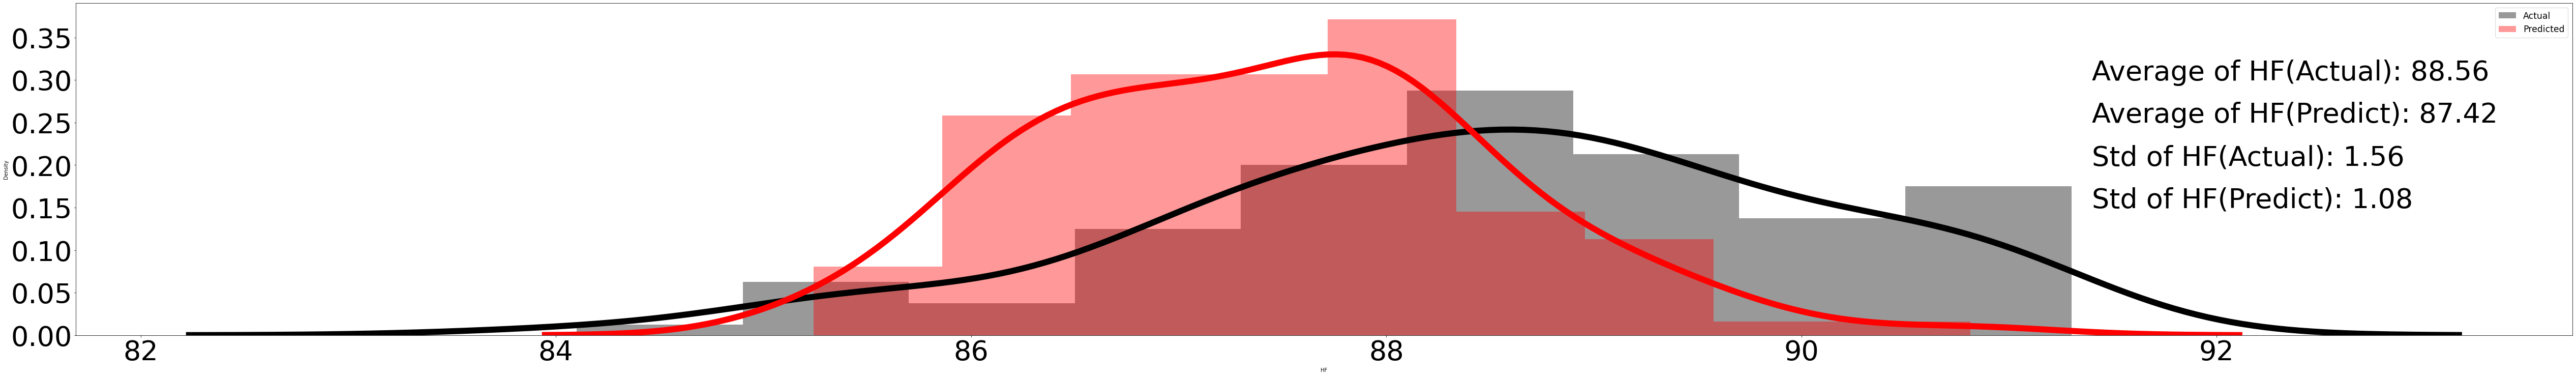

In [118]:
import seaborn as sns
#Converting Predict_test to dataframe to plot the graph
predict = pd.DataFrame(predict_test, columns = ['HF_Predict'])

#Plotting Actual vs predicated TS7
fig = plt.figure(figsize=(88, 12))

sns.distplot(y_test, color = 'black', kde_kws = {'linewidth':12}, label= 'Actual' )
sns.distplot(predict, color = 'red', kde_kws = {'linewidth':12}, label = 'Predicted')

plt.xticks(Fontsize = 54)
plt.yticks(Fontsize = 54)
plt.legend(fontsize = 'xx-large')
plt.text(91.4, 0.30, 'Average of HF(Actual): 88.56 ', fontsize = 54)
plt.text(91.4, 0.25, 'Average of HF(Predict): 87.42 ', fontsize = 54)
plt.text(91.4, 0.20, 'Std of HF(Actual): 1.56 ', fontsize = 54)
plt.text(91.4, 0.15, 'Std of HF(Predict): 1.08 ', fontsize = 54)
plt.show()
# fig.savefig("231_championmodel_TS7.jpg"1

In [90]:
# import pickle
# model_path= r'D:\Users\pawass\Documents\TSA\Champ_models_version1\HF_champ_py_2510.pkl'
# pickle.dump(xgb, open(model_path , 'wb'))
# print('Pickle File created')

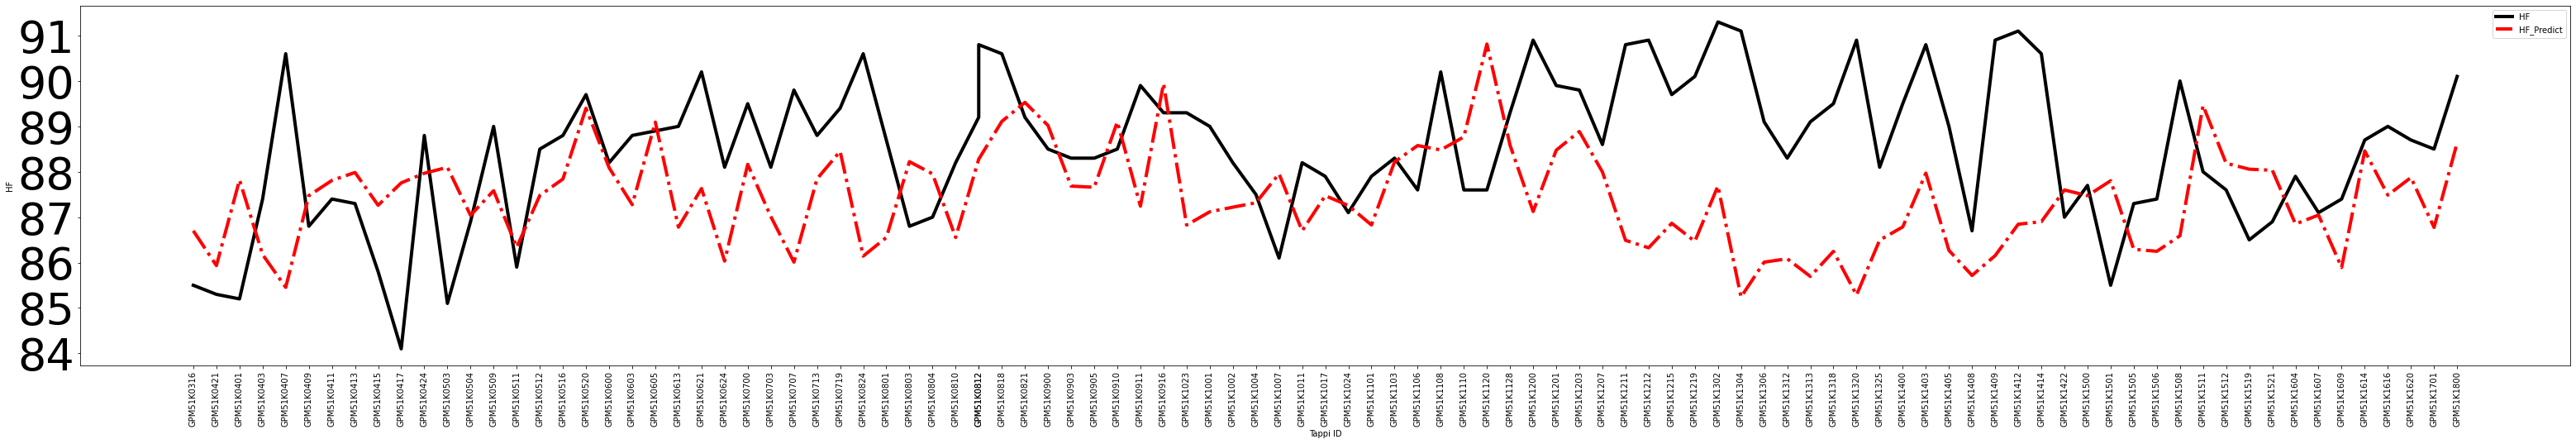

In [114]:
#Converting Predict_test to dataframe to plot the graph
predict = pd.DataFrame(predict_test, columns = ['HF_predict'])

#Plotting Actual vs predicated TS7
fig = plt.figure(figsize=(54, 8))

# first plot with X and Y data
plt.plot(test_61['TSA_TAPPI_1'], y_test, Label = 'HF', color = 'black', linewidth = 4)
      
# second plot with x1 and y1 data
plt.plot(test_61['TSA_TAPPI_1'], predict, '-.', label = 'HF_Predict', color = 'red', linewidth = 4)
# plt.xticks(x_date,labels)

plt.xlabel("Tappi ID")
plt.ylabel("HF")

plt.xticks(test_61['TSA_TAPPI_1'], rotation = 'vertical')
plt.yticks(fontsize = 54)
plt.legend()
plt.show()
# fig.savefig("231_championmodel_TS7.jpg")

## Shapley 

In [72]:
# Need to load JS vis in the notebook
shap.initjs()

## Shapely for Test data

In [73]:
x_train

,Release_Dose_Calc_mg_m,HEADBOX_PRES_psig,Steam_Box_Pressure_PSIG,PM15_Winder_Speed_FPM,Refiner_1_HPD_T,UHLEBOX1_VAC_Inhg,Hi_Bright_PM15_Ratio,EosYMoiPv_pct,Coating_Dose_Calc_mg_m,Refiner_3_HP_Control,Metso_Rush_Drag_to_DV,EUC_PM15_Ratio,VirginStock_PM15_Ratio,RPW_Pressure_PSI,PM_BWT_lbs_3000sqft,PM15_Fan_Pump_ORP_pH,Refiner_2_HPD_T,PM_15_TWS_Flow__ton
1074,9.514,32.286,1.209,468.134,0.0,18.971,20.0,4.182,4.295,201.81,1539.866,80.0,0.0,60.505,12.200,22.965,0.75,11.514
1075,9.492,36.085,1.190,2633.509,0.0,18.983,20.0,3.821,4.301,200.90,1577.163,80.0,0.0,62.976,12.765,157.663,0.58,8.817
1076,9.008,36.435,1.191,2239.374,0.0,18.998,20.0,3.846,4.305,203.99,1577.796,80.0,0.0,53.102,12.873,305.661,0.48,8.793
1077,9.019,36.295,1.189,776.491,0.0,18.990,20.0,3.812,4.298,214.97,1568.795,80.0,0.0,63.070,12.791,170.874,0.46,7.996
1078,8.499,36.091,1.190,764.613,0.0,19.006,20.0,3.835,4.298,202.82,1556.525,80.0,0.0,59.812,12.980,163.877,0.46,7.988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945,6.700,28.200,0.900,972.600,0.0,17.400,20.0,4.100,5.000,194.00,1627.800,80.0,0.0,63.200,15.300,398.700,0.25,8.600
1946,6.700,28.200,0.900,76.400,0.0,17.300,20.0,4.100,5.000,182.00,1627.700,80.0,0.0,56.000,14.900,207.400,0.24,8.600
1947,6.700,28.200,0.900,761.900,0.0,17.300,20.0,4.100,5.000,187.00,1626.800,80.0,0.0,50.300,15.300,187.200,0.24,8.600
1948,6.700,28.200,0.900,753.600,0.0,17.200,20.0,4.100,5.000,184.00,1627.100,80.0,0.0,59.100,15.300,160.900,0.24,8.600


In [74]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(x_test)

In [75]:
shap.force_plot(explainer.expected_value, shap_values[0,:], x_test.iloc[0,:])

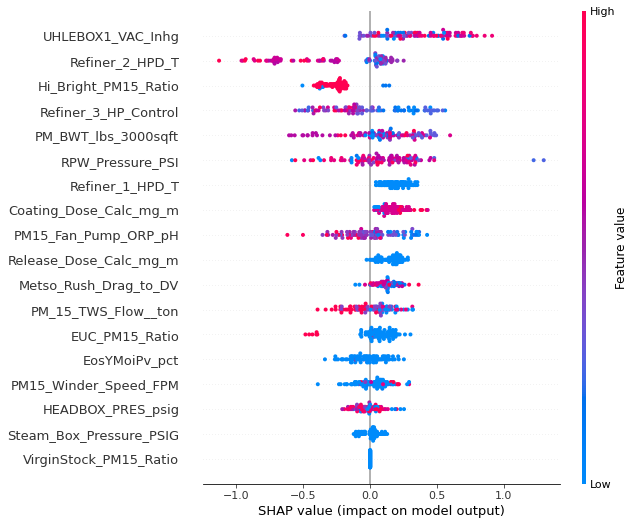

In [76]:
# shap_values = ex.shap_values(X_test)
shap.summary_plot(shap_values, x_test)

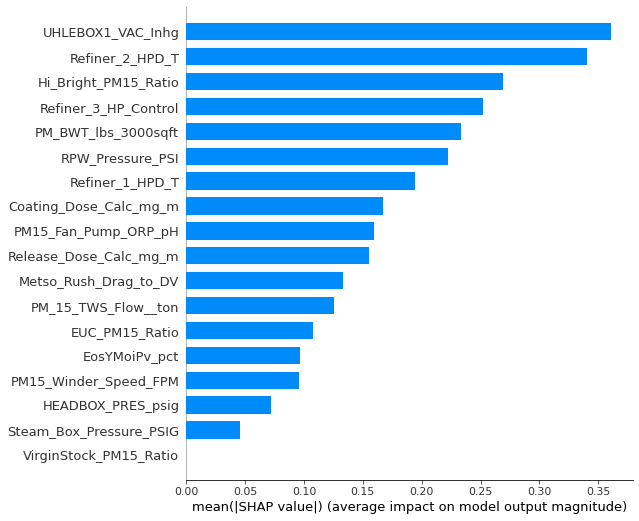

In [77]:
# shap.summary_plot(shap_values, X_test)
shap.summary_plot(shap_values, features=x_test, feature_names=x_test.columns, plot_type= "bar")

In [78]:
vals= np.abs(shap_values).mean(0)
feature_importance = pd.DataFrame(list(zip(x_test.columns,vals)),columns=['Shapely','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'],ascending=False,inplace=True)
feature_importance = feature_importance[feature_importance['feature_importance_vals'] > 0]
# feature_importance.to_csv("C:\\Users\\Pawas.seth\\Documents\\TSA\\Feature Selection\\Shapely_features_nocor.csv")
feature_importance.to_clipboard()

In [79]:
x_train

,Release_Dose_Calc_mg_m,HEADBOX_PRES_psig,Steam_Box_Pressure_PSIG,PM15_Winder_Speed_FPM,Refiner_1_HPD_T,UHLEBOX1_VAC_Inhg,Hi_Bright_PM15_Ratio,EosYMoiPv_pct,Coating_Dose_Calc_mg_m,Refiner_3_HP_Control,Metso_Rush_Drag_to_DV,EUC_PM15_Ratio,VirginStock_PM15_Ratio,RPW_Pressure_PSI,PM_BWT_lbs_3000sqft,PM15_Fan_Pump_ORP_pH,Refiner_2_HPD_T,PM_15_TWS_Flow__ton
1074,9.514,32.286,1.209,468.134,0.0,18.971,20.0,4.182,4.295,201.81,1539.866,80.0,0.0,60.505,12.200,22.965,0.75,11.514
1075,9.492,36.085,1.190,2633.509,0.0,18.983,20.0,3.821,4.301,200.90,1577.163,80.0,0.0,62.976,12.765,157.663,0.58,8.817
1076,9.008,36.435,1.191,2239.374,0.0,18.998,20.0,3.846,4.305,203.99,1577.796,80.0,0.0,53.102,12.873,305.661,0.48,8.793
1077,9.019,36.295,1.189,776.491,0.0,18.990,20.0,3.812,4.298,214.97,1568.795,80.0,0.0,63.070,12.791,170.874,0.46,7.996
1078,8.499,36.091,1.190,764.613,0.0,19.006,20.0,3.835,4.298,202.82,1556.525,80.0,0.0,59.812,12.980,163.877,0.46,7.988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945,6.700,28.200,0.900,972.600,0.0,17.400,20.0,4.100,5.000,194.00,1627.800,80.0,0.0,63.200,15.300,398.700,0.25,8.600
1946,6.700,28.200,0.900,76.400,0.0,17.300,20.0,4.100,5.000,182.00,1627.700,80.0,0.0,56.000,14.900,207.400,0.24,8.600
1947,6.700,28.200,0.900,761.900,0.0,17.300,20.0,4.100,5.000,187.00,1626.800,80.0,0.0,50.300,15.300,187.200,0.24,8.600
1948,6.700,28.200,0.900,753.600,0.0,17.200,20.0,4.100,5.000,184.00,1627.100,80.0,0.0,59.100,15.300,160.900,0.24,8.600


## Shapely for train data

In [80]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(x_train)

In [81]:
shap.force_plot(explainer.expected_value, shap_values[0,:], x_train.iloc[0,:])

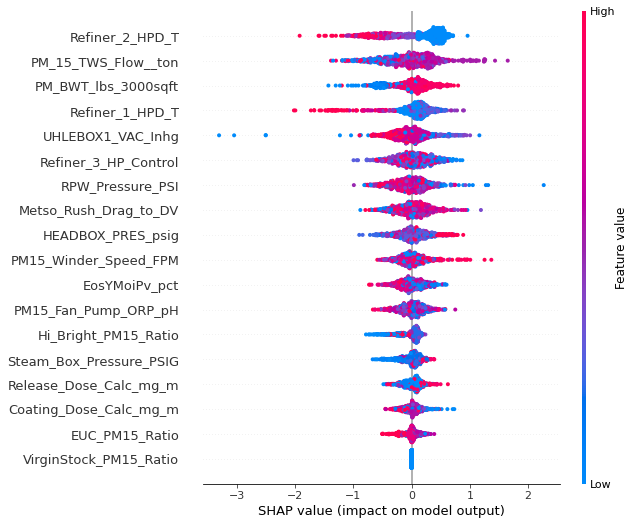

In [82]:
# shap_values = ex.shap_values(X_test)
shap.summary_plot(shap_values, x_train)

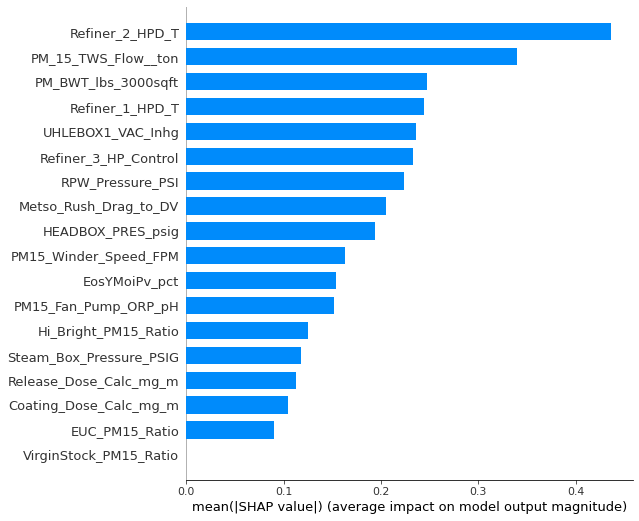

In [83]:
# shap.summary_plot(shap_values, X_test)
shap.summary_plot(shap_values, features=x_train, feature_names=x_train.columns, plot_type= "bar")

## Normalising the data and Plotting for Top 6 Features

In [84]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [85]:
#Normalising test data
x_test = NormalizeData(x_test)
x_test

,Release_Dose_Calc_mg_m,HEADBOX_PRES_psig,Steam_Box_Pressure_PSIG,PM15_Winder_Speed_FPM,Refiner_1_HPD_T,UHLEBOX1_VAC_Inhg,Hi_Bright_PM15_Ratio,EosYMoiPv_pct,Coating_Dose_Calc_mg_m,Refiner_3_HP_Control,Metso_Rush_Drag_to_DV,EUC_PM15_Ratio,VirginStock_PM15_Ratio,RPW_Pressure_PSI,PM_BWT_lbs_3000sqft,PM15_Fan_Pump_ORP_pH,Refiner_2_HPD_T,PM_15_TWS_Flow__ton
1950,NaN,0.000000,NaN,0.870588,NaN,0.777778,0.0,0.052632,0.000000,0.303571,0.962791,1.0,NaN,0.552486,0.454545,0.108690,1.000000,1.000000
1951,NaN,0.000000,NaN,0.073382,NaN,0.777778,0.0,0.052632,0.000000,0.500000,0.948837,1.0,NaN,0.685083,0.636364,0.181150,1.000000,1.000000
1952,NaN,0.000000,NaN,0.862059,NaN,0.777778,0.0,0.052632,0.000000,0.517857,0.962791,1.0,NaN,0.779006,0.363636,0.816750,1.000000,1.000000
1953,NaN,0.000000,NaN,1.000000,NaN,0.777778,0.0,0.052632,0.000000,0.392857,0.967442,1.0,NaN,0.687845,0.272727,0.369913,1.000000,1.000000
1954,NaN,0.100000,NaN,0.673824,NaN,0.666667,0.0,0.052632,0.000000,0.500000,1.000000,1.0,NaN,0.767956,0.636364,0.454713,0.933333,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2045,NaN,0.933333,NaN,0.000000,NaN,0.777778,1.0,0.052632,0.714286,0.053571,0.139535,0.0,NaN,0.814917,0.545455,0.026779,0.466667,0.833333
2046,NaN,0.933333,NaN,0.000000,NaN,0.777778,1.0,0.052632,0.714286,0.410714,0.167442,0.0,NaN,0.787293,0.545455,0.000000,0.466667,0.833333
2047,NaN,0.933333,NaN,0.000000,NaN,0.777778,1.0,0.052632,0.714286,0.285714,0.167442,0.0,NaN,0.488950,0.636364,0.137306,0.466667,0.500000
2048,NaN,0.933333,NaN,0.000000,NaN,0.777778,1.0,0.052632,0.714286,0.339286,0.153488,0.0,NaN,0.790055,0.545455,0.797060,0.466667,0.500000


In [86]:
list_shapely = ['HEADBOX_PRES_psig'
]
# ,'Reel_Crepe_PV','Suction_Pres_Roll_DS_Pressure'
# ,'PM_15_TWS_Flow__ton'
# ,'Yankee_Speed_FPM'
# ,'WE_BURNER_deg_F'
len(list_shapely)

1

In [87]:
for i in list_shapely:
    str1 = "Feature_"
    str1 = str1 + i
    print(i)
    plt.figure(figsize=(54, 8))
    plt.plot(test_103.TSA_TAPPI_1,x_test[i], Label = i)
    plt.xlabel("Date")
    plt.xticks(test_103.TSA_TAPPI_1, rotation =45)
    matplotlib.rcParams['legend.fontsize'] = 30
    plt.legend(loc=1)
    plt.savefig(str1+".png")
    plt.show()

HEADBOX_PRES_psig


NameError: name 'test_103' is not defined

<Figure size 3888x576 with 0 Axes>

In [ ]:
vals= np.abs(shap_values).mean(0)
feature_importance = pd.DataFrame(list(zip(x_test.columns,vals)),columns=['Shapely','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'],ascending=False,inplace=True)
feature_importance = feature_importance[feature_importance['feature_importance_vals'] > 0]
# feature_importance.to_csv("C:\\Users\\Pawas.seth\\Documents\\TSA\\Feature Selection\\Shapely_features_nocor.csv")
feature_importance.to_clipboard()
# len(feature_importance)